## Set up the dependencies

In [1]:
# for reading and validating data
import emeval.input.spec_details as eisd
import emeval.input.phone_view as eipv
import emeval.input.eval_view as eiev

In [2]:
# Visualization helpers
import emeval.viz.phone_view as ezpv
import emeval.viz.eval_view as ezev

In [3]:
# Analytics results
import emeval.metrics.baseline_segmentation as embs

In [4]:
# For plots
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
%matplotlib inline

import IPython.display as ipyd

In [5]:
# For maps
import folium
import branca.element as bre

In [6]:
# For easier debugging while working on modules
import importlib

In [7]:
import pandas as pd
pd.options.display.float_format = '{:.6f}'.format
import arrow
import numpy as np

In [8]:
THIRTY_MINUTES = 30 * 60
TEN_MINUTES = 10 * 60

## The spec

The spec defines what experiments were done, and over which time ranges. Once the experiment is complete, most of the structure is read back from the data, but we use the spec to validate that it all worked correctly. The spec also contains the ground truth for the legs. Here, we read the spec for the trip to UC Berkeley.

In [9]:
DATASTORE_LOC = "bin/data"
AUTHOR_EMAIL = "shankari@eecs.berkeley.edu"
sd_la = eisd.FileSpecDetails(DATASTORE_LOC, AUTHOR_EMAIL, "unimodal_trip_car_bike_mtv_la")
sd_sj = eisd.FileSpecDetails(DATASTORE_LOC, AUTHOR_EMAIL, "car_scooter_brex_san_jose")
sd_ucb = eisd.FileSpecDetails(DATASTORE_LOC, AUTHOR_EMAIL, "train_bus_ebike_mtv_ucb")

After iterating over 1 entries, entry found
Found spec = Round trip car and bike trip in the South Bay
Evaluation ran from 2019-07-20T00:00:00-07:00 -> 2020-04-29T17:00:00-07:00
After iterating over 1 entries, entry found
Found spec = Multi-modal car scooter BREX trip to San Jose
Evaluation ran from 2019-07-20T00:00:00-07:00 -> 2020-04-29T17:00:00-07:00
After iterating over 1 entries, entry found
Found spec = Multimodal multi-train, multi-bus, ebike trip to UC Berkeley
Evaluation ran from 2019-07-16T00:00:00-07:00 -> 2020-04-30T00:00:00-07:00


## The views

There are two main views for the data - the phone view and the evaluation view. 

### Phone view

In the phone view, the phone is primary, and then there is a tree that you can traverse to get the data that you want. Traversing that tree typically involves nested for loops; here's an example of loading the phone view and traversing it. You can replace the print statements with real code. When you are ready to check this in, please move the function to one of the python modules so that we can invoke it more generally

In [10]:
importlib.reload(eipv)

<module 'emeval.input.phone_view' from '/Users/kshankar/e-mission/mobilitynet-analysis-scripts/emeval/input/phone_view.py'>

In [11]:
pv_la = eipv.PhoneView(sd_la)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
Loading transitions for phone ucb-sdb-android-2
Loading transitions for phone ucb-sdb-android-3
Loading transitions for phone ucb-sdb-android-4
Reading data for ios phones
Loading transitions for phone ucb-sdb-ios-1
Loading transitions for phone ucb-sdb-ios-2
Loading transitions for phone ucb-sdb-ios-3
Loading transitions for phone ucb-sdb-ios-4
-------------------- About to fill calibration ranges --------------------
Processing data for android phones
Processing transitions for phone ucb-sdb-android-1
Filtered 86 total -> 0 calibration transitions 
Processing transitions for phone ucb-sdb-android-2
Filtered 86 total -> 0 calibration transitions 
Processing transitions for phone ucb-sdb-android-3
Filtered 86 total -> 0 calibration transitions 
Processing transitions for phone ucb-sdb-android-4
Filtered 86 total -> 0 calibration

-------------------- About to fill in location information --------------------
Processing data for android phones
Processing data for ios phones
Processing data for android phones
Processing data for ios phones
-------------------- About to fill in motion activity information --------------------
Processing data for android phones
Processing data for ios phones
Processing data for android phones
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been proc

In [12]:
pv_sj = eipv.PhoneView(sd_sj)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
Loading transitions for phone ucb-sdb-android-2
Loading transitions for phone ucb-sdb-android-3
Loading transitions for phone ucb-sdb-android-4
Reading data for ios phones
Loading transitions for phone ucb-sdb-ios-1
Loading transitions for phone ucb-sdb-ios-2
Loading transitions for phone ucb-sdb-ios-3
Loading transitions for phone ucb-sdb-ios-4
-------------------- About to fill calibration ranges --------------------
Processing data for android phones
Processing transitions for phone ucb-sdb-android-1
Filtered 86 total -> 0 calibration transitions 
Processing transitions for phone ucb-sdb-android-2
Filtered 86 total -> 0 calibration transitions 
Processing transitions for phone ucb-sdb-android-3
Filtered 86 total -> 0 calibration transitions 
Processing transitions for phone ucb-sdb-android-4
Filtered 86 total -> 0 calibration

Processing data for ios phones
-------------------- About to fill in motion activity information --------------------
Processing data for android phones
Processing data for ios phones
Processing data for android phones
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not b

In [13]:
pv_ucb = eipv.PhoneView(sd_ucb)

-------------------- About to read transitions from server --------------------
Reading data for android phones
Loading transitions for phone ucb-sdb-android-1
Loading transitions for phone ucb-sdb-android-2
Loading transitions for phone ucb-sdb-android-3
Loading transitions for phone ucb-sdb-android-4
Reading data for ios phones
Loading transitions for phone ucb-sdb-ios-1
Loading transitions for phone ucb-sdb-ios-2
Loading transitions for phone ucb-sdb-ios-3
Loading transitions for phone ucb-sdb-ios-4
-------------------- About to fill calibration ranges --------------------
Processing data for android phones
Processing transitions for phone ucb-sdb-android-1
Filtered 102 total -> 0 calibration transitions 
Processing transitions for phone ucb-sdb-android-2
Filtered 90 total -> 0 calibration transitions 
Processing transitions for phone ucb-sdb-android-3
Filtered 90 total -> 0 calibration transitions 
Processing transitions for phone ucb-sdb-android-4
Filtered 90 total -> 0 calibratio

Processing data for ios phones
-------------------- About to fill in location information --------------------
Processing data for android phones
Processing data for ios phones
Processing data for android phones
Processing data for ios phones
-------------------- About to fill in motion activity information --------------------
Processing data for android phones
Processing data for ios phones
Processing data for android phones
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
motion activity has not been processed, copying write_ts -> ts
mo

Filling label ucb-sdb-android-2 for OS android
Filling label ucb-sdb-android-3 for OS android
Filling label ucb-sdb-android-4 for OS android
Filling label ucb-sdb-ios-1 for OS ios
Filling label ucb-sdb-ios-2 for OS ios
Filling label ucb-sdb-ios-3 for OS ios
Filling label ucb-sdb-ios-4 for OS ios
-------------------- Done populating information from server --------------------


In [14]:
range_0 = pv_la.map()["android"]["ucb-sdb-android-2"]["evaluation_ranges"][0]

In [15]:
arrow.get(range_0["start_ts"]).to("America/Los_angeles"), arrow.get(range_0["end_ts"]).to("America/Los_angeles")

(<Arrow [2019-07-27T17:38:24.968000-07:00]>,
 <Arrow [2019-07-27T19:53:22.886000-07:00]>)

In [16]:
for t in range_0["evaluation_trip_ranges"]:
    print(arrow.get(t["start_ts"]).to("America/Los_angeles"), arrow.get(t["end_ts"]).to("America/Los_angeles"))
    for s in t["evaluation_section_ranges"]:
        print("-------", arrow.get(s["start_ts"]).to("America/Los_angeles"), arrow.get(s["end_ts"]).to("America/Los_angeles"))

2019-07-27T17:38:54.143985-07:00 2019-07-27T17:54:56.504297-07:00
------- 2019-07-27T17:38:54.192643-07:00 2019-07-27T17:40:03.303200-07:00
------- 2019-07-27T17:40:03.318182-07:00 2019-07-27T17:52:26.823849-07:00
------- 2019-07-27T17:52:26.843096-07:00 2019-07-27T17:54:56.450234-07:00
2019-07-27T18:59:17.435039-07:00 2019-07-27T19:20:57.464819-07:00
------- 2019-07-27T18:59:17.495898-07:00 2019-07-27T19:01:06.611826-07:00
------- 2019-07-27T19:01:06.626976-07:00 2019-07-27T19:20:31.044772-07:00
------- 2019-07-27T19:20:31.060968-07:00 2019-07-27T19:20:57.402429-07:00


In [17]:
import emeval.analysed.phone_view as eapv

In [18]:
importlib.reload(eapv)

<module 'emeval.analysed.phone_view' from '/Users/kshankar/e-mission/mobilitynet-analysis-scripts/emeval/analysed/phone_view.py'>

In [19]:
MASTER_DATA_LOC = "bin/data/master_9b70c97"
eisd.FileSpecDetails(MASTER_DATA_LOC, AUTHOR_EMAIL)

In [20]:
av_la = eapv.create_analysed_view(pv_la, eisd.FileSpecDetails("bin/data/master_9b70c97", AUTHOR_EMAIL), "analysis/recreated_location", "analysis/cleaned_trip", "analysis/inferred_section")

Finished copying unimodal_trip_car_bike_mtv_la, starting overwrite
Found spec = Round trip car and bike trip in the South Bay
Evaluation ran from 2019-07-20T00:00:00-07:00 -> 2020-04-29T17:00:00-07:00
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
android dict_keys(['ucb-sdb-android-1', 'ucb-sdb-android-2', 'ucb-sdb-android-3', 'ucb-sdb-android-4'])
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-1 accuracy_control dict_keys(['role', 'manual/evaluation_transition', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges'])
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         fixed:ACCURACY

Before filtering, trips = [('2019-07-28T10:21:47.338000-07:00', '2019-07-28T10:32:22-07:00'), ('2019-07-28T11:50:20.124734-07:00', '2019-07-28T12:01:27-07:00'), ('2019-07-28T12:01:57-07:00', '2019-07-28T12:01:57-07:00'), ('2019-07-28T12:02:28-07:00', '2019-07-28T12:03:58-07:00'), ('2019-07-28T12:05:28-07:00', '2019-07-28T12:10:00-07:00')]
Filter range = 2019-07-28T11:48:06.675345-07:00 -> 2019-07-28T12:09:44.829831-07:00
After filtering, trips = ['2019-07-28T11:50:20.124734-07:00', '2019-07-28T12:01:57-07:00', '2019-07-28T12:02:28-07:00', '2019-07-28T12:05:28-07:00']
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         

Before filtering, trips = [('2019-07-28T15:07:32.811940-07:00', '2019-07-28T15:15:24.998590-07:00'), ('2019-07-28T15:15:26.998613-07:00', '2019-07-28T15:18:05.993966-07:00'), ('2019-07-28T16:35:57.908857-07:00', '2019-07-28T16:45:56.997239-07:00'), ('2019-07-28T16:45:57.997204-07:00', '2019-07-28T16:46:03.996983-07:00'), ('2019-07-28T16:46:04.996947-07:00', '2019-07-28T16:53:34.996686-07:00'), ('2019-07-28T16:53:36.996612-07:00', '2019-07-28T16:55:43.830019-07:00')]
Filter range = 2019-07-28T16:33:42.064345-07:00 -> 2019-07-28T16:54:40.320724-07:00
After filtering, trips = ['2019-07-28T16:35:57.908857-07:00', '2019-07-28T16:45:57.997204-07:00', '2019-07-28T16:46:04.996947-07:00', '2019-07-28T16:53:36.996612-07:00']
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_locat

Before filtering, trips = [('2019-08-31T15:02:50.999717-07:00', '2019-08-31T15:03:26.998827-07:00'), ('2019-08-31T15:03:30.998668-07:00', '2019-08-31T15:03:30.998668-07:00'), ('2019-08-31T15:03:38.998345-07:00', '2019-08-31T15:12:28.995477-07:00'), ('2019-08-31T15:13:25.995546-07:00', '2019-08-31T15:14:30.993356-07:00'), ('2019-08-31T16:32:33.961561-07:00', '2019-08-31T16:39:48.985268-07:00'), ('2019-08-31T16:39:55.984972-07:00', '2019-08-31T16:39:55.984972-07:00'), ('2019-08-31T16:40:02.984676-07:00', '2019-08-31T16:43:46.995780-07:00'), ('2019-08-31T16:45:30.991822-07:00', '2019-08-31T16:47:16.987788-07:00'), ('2019-08-31T16:47:23.987522-07:00', '2019-08-31T16:49:46.998160-07:00'), ('2019-08-31T16:51:40.994053-07:00', '2019-08-31T16:52:58.057469-07:00')]
Filter range = 2019-08-31T14:57:42.798072-07:00 -> 2019-08-31T15:14:48.798746-07:00
After filtering, trips = ['2019-08-31T15:02:50.999717-07:00', '2019-08-31T15:03:30.998668-07:00', '2019-08-31T15:03:38.998345-07:00', '2019-08-31T15:

In [21]:
range_0 = av_la.map()["ios"]["ucb-sdb-ios-3"]["evaluation_ranges"][0]
for t in range_0["sensed_trip_ranges"]:
    print(arrow.get(t["start_ts"]).to("America/Los_angeles"), arrow.get(t["end_ts"]).to("America/Los_angeles"))
print("=======")
for s in range_0["sensed_section_ranges"]:
    print(arrow.get(s["start_ts"]).to("America/Los_angeles"), arrow.get(s["end_ts"]).to("America/Los_angeles"))
print("=======")

for t in range_0["evaluation_trip_ranges"]:
    print(arrow.get(t["start_ts"]).to("America/Los_angeles"), arrow.get(t["end_ts"]).to("America/Los_angeles"))
    for s in t["sensed_section_ranges"]:
        print("-------", arrow.get(s["start_ts"]).to("America/Los_angeles"), arrow.get(s["end_ts"]).to("America/Los_angeles"))

2019-07-27T19:01:45.481526-07:00 2019-07-27T19:21:37.427862-07:00
2019-07-27T19:01:45.481526-07:00 2019-07-27T19:21:37.427862-07:00
2019-07-27T17:38:54.143985-07:00 2019-07-27T17:54:56.504297-07:00
2019-07-27T18:59:17.435039-07:00 2019-07-27T19:20:57.464819-07:00
------- 2019-07-27T19:01:45.481526-07:00 2019-07-27T19:21:37.427862-07:00


In [22]:
# av_la = eapv.create_analysed_view(pv_la, "http://localhost:8080", "analysis/recreated_location", "analysis/cleaned_trip", "analysis/inferred_section")
av_sj = eapv.create_analysed_view(pv_sj, eisd.FileSpecDetails("bin/data/master_9b70c97", AUTHOR_EMAIL), "analysis/recreated_location", "analysis/cleaned_trip", "analysis/inferred_section")
av_ucb = eapv.create_analysed_view(pv_ucb, eisd.FileSpecDetails("bin/data/master_9b70c97", AUTHOR_EMAIL), "analysis/recreated_location", "analysis/cleaned_trip", "analysis/inferred_section")
# av_ucb_reroute = eapv.create_analysed_view(pv_ucb_reroute, "http://localhost:8080", "analysis/recreated_location", "analysis/cleaned_trip", "analysis/inferred_section")

Finished copying car_scooter_brex_san_jose, starting overwrite
Found spec = Multi-modal car scooter BREX trip to San Jose
Evaluation ran from 2019-07-20T00:00:00-07:00 -> 2020-04-29T17:00:00-07:00
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
android dict_keys(['ucb-sdb-android-1', 'ucb-sdb-android-2', 'ucb-sdb-android-3', 'ucb-sdb-android-4'])
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-1 accuracy_control dict_keys(['role', 'manual/evaluation_transition', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges'])
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         fixed:ACCURACY_CON

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         HAHFDC v/s MAHFDC:HAHFDC_2 HAHFDC v/s MAHFDC HAHFDC_2 2
Before filtering, trips = [('2019-08-07T09:21:47.112000-07:00', '2019-08-07T09:24:05-07:00'), ('2019-08-07T09:24:06-07:00', '2019-08-07T09:25:36-07:00'), ('2019-08-07T09:25:37-07:00', '2019-08-07T09:26:05-07:00'), ('2019-08-07T09:26:06-07:00', '2019-08-07T09:28:28-07:00'), ('2019-08-07T09:28:29-07:00', '2019-08-07T09:29:18-07:00'), ('2019-08-07T09:29:19-07:00', '2019-08-07T09:29:43-07:00'), ('2019-08-07T09:29:44-07:00', '2019-08-07T09:47:18-07:00'), ('2019-08-07T09:47:19-07:00', '2019-08-07T09:53:19.901000-07:00'

Before filtering, trips = [('2019-07-27T09:14:44-07:00', '2019-07-27T09:40:10-07:00'), ('2019-07-27T09:40:37.915000-07:00', '2019-07-27T09:42:13.223000-07:00'), ('2019-07-27T12:56:27.402749-07:00', '2019-07-27T13:11:49-07:00'), ('2019-07-27T13:12:19-07:00', '2019-07-27T13:13:35.147000-07:00'), ('2019-07-27T13:13:49-07:00', '2019-07-27T13:18:35-07:00'), ('2019-07-27T13:22:30.733146-07:00', '2019-07-27T14:01:21-07:00'), ('2019-07-27T14:01:48-07:00', '2019-07-27T14:10:51-07:00')]
Filter range = 2019-07-27T12:53:38.202683-07:00 -> 2019-07-27T14:11:01.009420-07:00
After filtering, trips = ['2019-07-27T12:56:27.402749-07:00', '2019-07-27T13:12:19-07:00', '2019-07-27T13:13:49-07:00', '2019-07-27T13:22:30.733146-07:00', '2019-07-27T14:01:48-07:00']
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 

Before filtering, trips = []
Filter range = 2020-03-04T11:20:16.665268-08:00 -> 2020-03-04T11:51:48.554702-08:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2020-03-04T15:34:28.447122-08:00 -> 2020-03-04T17:09:43.546934-08:00
After filtering, trips = []
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-ios-2 evaluation_0 dict_keys(['role', 'manual/evaluation_transition', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges'])
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         HAHFDC v/s MAHFDC:HAHFDC_0 HAHFDC v/s MAHFDC HAHFDC_0 2
Before filtering, tr

Before filtering, trips = [('2019-08-07T09:23:02.547250-07:00', '2019-08-07T09:44:11.985745-07:00'), ('2019-08-07T09:44:12.985707-07:00', '2019-08-07T09:45:16.998617-07:00'), ('2019-08-07T09:45:17.998619-07:00', '2019-08-07T09:47:13.995059-07:00'), ('2019-08-07T09:47:14.995023-07:00', '2019-08-07T09:49:59.531748-07:00'), ('2019-08-07T13:41:09.983535-07:00', '2019-08-07T13:43:59.998353-07:00'), ('2019-08-07T13:44:00.998310-07:00', '2019-08-07T13:45:03.996617-07:00'), ('2019-08-07T13:45:05.996582-07:00', '2019-08-07T13:45:36.995543-07:00'), ('2019-08-07T13:45:37.995502-07:00', '2019-08-07T14:05:12.984882-07:00'), ('2019-08-07T14:05:16.984712-07:00', '2019-08-07T14:05:46.994138-07:00'), ('2019-08-07T14:05:47.994515-07:00', '2019-08-07T14:07:23.996792-07:00'), ('2019-08-07T14:07:24.996754-07:00', '2019-08-07T14:07:33.996404-07:00'), ('2019-08-07T14:07:34.996366-07:00', '2019-08-07T14:32:19.991592-07:00'), ('2019-08-07T14:32:20.991552-07:00', '2019-08-07T14:36:09.998307-07:00'), ('2019-08-0

Before filtering, trips = [('2019-08-05T10:32:22.335140-07:00', '2019-08-05T10:55:34.997035-07:00'), ('2019-08-05T10:56:02.996000-07:00', '2019-08-05T10:57:49.991994-07:00'), ('2019-08-05T15:04:31.337241-07:00', '2019-08-05T15:09:56.988751-07:00'), ('2019-08-05T15:10:21.987585-07:00', '2019-08-05T15:10:21.987585-07:00'), ('2019-08-05T15:10:52.986137-07:00', '2019-08-05T15:10:52.986137-07:00'), ('2019-08-05T15:11:00.985764-07:00', '2019-08-05T15:13:08.979793-07:00'), ('2019-08-05T15:13:59.977416-07:00', '2019-08-05T15:13:59.977416-07:00'), ('2019-08-05T15:14:07.989907-07:00', '2019-08-05T15:22:42.979539-07:00'), ('2019-08-05T15:22:50.979212-07:00', '2019-08-05T15:22:50.979212-07:00'), ('2019-08-05T15:22:56.978963-07:00', '2019-08-05T15:26:47.992232-07:00'), ('2019-08-05T15:34:35.991219-07:00', '2019-08-05T15:34:42.990969-07:00'), ('2019-08-05T15:34:45.990864-07:00', '2019-08-05T16:08:43.994686-07:00'), ('2019-08-05T16:09:33.992770-07:00', '2019-08-05T16:18:29.994664-07:00')]
Filter rang

Finished copying train_bus_ebike_mtv_ucb, starting overwrite
Found spec = Multimodal multi-train, multi-bus, ebike trip to UC Berkeley
Evaluation ran from 2019-07-16T00:00:00-07:00 -> 2020-04-30T00:00:00-07:00
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
android dict_keys(['ucb-sdb-android-1', 'ucb-sdb-android-2', 'ucb-sdb-android-3', 'ucb-sdb-android-4'])
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-1 accuracy_control dict_keys(['role', 'manual/evaluation_transition', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges'])
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         fixed

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         HAHFDC v/s HAMFDC:HAHFDC_2 HAHFDC v/s HAMFDC HAHFDC_2 3
Before filtering, trips = [('2019-07-26T08:13:56.672000-07:00', '2019-07-26T08:24:22-07:00'), ('2019-07-26T08:31:58.409877-07:00', '2019-07-26T09:09:17-07:00'), ('2019-07-26T09:09:18-07:00', '2019-07-26T09:09:29-07:00'), ('2019-07-26T09:09:30-07:00', '2019-07-26T09:09:55-07:00'), ('2019-07-26T09:09:56-07:00', '2019-07-26T09:10:23.602000-07:00'), ('2019-07-26T09:10:32.228000-07:00', '2019-07-26T09:13:57-07:00'), ('2019-07-26T09:19:19.797482-07:00', '2019-07-26T10:14:17.764000-07:00'), ('2019-07-26T10:14:22.830000-

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         HAHFDC v/s MAHFDC:HAHFDC_2 HAHFDC v/s MAHFDC HAHFDC_2 3
Before filtering, trips = [('2019-09-17T08:10:33.181000-07:00', '2019-09-17T08:23:10-07:00'), ('2019-09-17T08:23:12-07:00', '2019-09-17T08:23:16-07:00'), ('2019-09-17T08:32:46.823959-07:00', '2019-09-17T09:05:11-07:00'), ('2019-09-17T09:14:10-07:00', '2019-09-17T09:14:24-07:00'), ('2019-09-17T09:14:25-07:00', '2019-09-17T09:18:49-07:00'), ('2019-09-17T09:24:02.966953-07:00', '2019-09-17T10:10:33-07:00'), ('2019-09-17T10:16:01-07:00', '2019-09-17T10:18:53-07:00'), ('2019-09-17T10:33:16.758010-07:00', '2019-09-17T1

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         MAMFDC v/s HAMFDC:MAMFDC_2 MAMFDC v/s HAMFDC MAMFDC_2 3
Before filtering, trips = [('2019-12-03T08:16:57.027000-08:00', '2019-12-03T08:30:25.528000-08:00'), ('2019-12-03T08:41:38.478000-08:00', '2019-12-03T09:13:39.520000-08:00'), ('2019-12-03T09:17:52.781573-08:00', '2019-12-03T10:19:07.899000-08:00'), ('2019-12-03T10:27:42.457942-08:00', '2019-12-03T10:34:05.923000-08:00'), ('2019-12-03T14:14:57.823089-08:00', '2019-12-03T14:28:10.982000-08:00'), ('2019-12-03T16:16:05.528018-08:00', '2019-12-03T16:21:06.134000-08:00'), ('2019-12-03T16:22:10.099000-08:00', '2019-12-0

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         MAMFDC v/s MAHFDC:MAMFDC_2 MAMFDC v/s MAHFDC MAMFDC_2 3
Before filtering, trips = [('2020-02-06T08:17:54.066000-08:00', '2020-02-06T08:27:01.474000-08:00'), ('2020-02-06T08:33:17.674182-08:00', '2020-02-06T09:10:45.548000-08:00'), ('2020-02-06T09:12:22.496000-08:00', '2020-02-06T09:14:30.481000-08:00'), ('2020-02-06T09:17:30.481000-08:00', '2020-02-06T10:17:06.028000-08:00'), ('2020-02-06T10:22:57.080719-08:00', '2020-02-06T10:29:21.951000-08:00'), ('2020-02-06T10:29:52.939000-08:00', '2020-02-06T10:30:57.059000-08:00'), ('2020-02-06T13:08:18.314395-08:00', '2020-02-0

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         HAHFDC v/s HAMFDC:HAMFDC_2 HAHFDC v/s HAMFDC HAMFDC_2 3
Before filtering, trips = [('2019-07-26T08:13:43.987000-07:00', '2019-07-26T08:23:51-07:00'), ('2019-07-26T08:31:55.399292-07:00', '2019-07-26T08:58:43-07:00'), ('2019-07-26T09:01:43-07:00', '2019-07-26T09:02:43-07:00'), ('2019-07-26T09:03:42-07:00', '2019-07-26T09:06:13-07:00'), ('2019-07-26T09:10:12-07:00', '2019-07-26T09:12:11-07:00'), ('2019-07-26T09:12:35-07:00', '2019-07-26T09:13:33.039000-07:00'), ('2019-07-26T09:19:08.810500-07:00', '2019-07-26T10:10:23-07:00'), ('2019-07-26T10:14:25-07:00', '2019-07-26T1

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         HAHFDC v/s MAHFDC:MAHFDC_2 HAHFDC v/s MAHFDC MAHFDC_2 3
Before filtering, trips = [('2019-09-17T08:06:57.721000-07:00', '2019-09-17T08:25:26.027000-07:00'), ('2019-09-17T08:26:12.531477-07:00', '2019-09-17T08:35:13.064000-07:00'), ('2019-09-17T08:35:17.403000-07:00', '2019-09-17T09:14:06-07:00'), ('2019-09-17T09:14:07-07:00', '2019-09-17T09:16:17.829000-07:00'), ('2019-09-17T09:16:27-07:00', '2019-09-17T09:16:27-07:00'), ('2019-09-17T09:17:07-07:00', '2019-09-17T09:19:15.624000-07:00'), ('2019-09-17T09:20:54-07:00', '2019-09-17T09:21:09-07:00'), ('2019-09-17T09:26:30.

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         MAMFDC v/s MAHFDC:MAHFDC_0 MAMFDC v/s MAHFDC MAHFDC_0 3
Before filtering, trips = [('2019-12-09T08:18:54.653000-08:00', '2019-12-09T08:32:07.875000-08:00'), ('2019-12-09T08:32:18.082000-08:00', '2019-12-09T09:06:49.681000-08:00'), ('2019-12-09T09:06:59.646000-08:00', '2019-12-09T09:09:16.277000-08:00'), ('2019-12-09T09:18:04.893068-08:00', '2019-12-09T10:10:32.251000-08:00'), ('2019-12-09T10:14:17.333000-08:00', '2019-12-09T10:16:28.664000-08:00'), ('2019-12-09T10:27:14.054911-08:00', '2019-12-09T10:31:31.435000-08:00'), ('2019-12-09T10:31:36.485000-08:00', '2019-12-0

     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-4 power_control dict_keys(['role', 'manual/evaluation_transition', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges'])
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         fixed:POWER_CONTROL_0 HAHFDC v/s HAMFDC power_control_0 3
Before filtering, trips = []
Filter range = 2019-07-24T07:51:42.185629-07:00 -> 2019-07-24T10:26:37.702858-07:00
After filtering, trips = []
Before filtering, trips = []
Filter range = 2019-07-24T14:12:16.706653-07:00 -> 2019-07-24T14:25:34.793104-07:00
After filtering, trips = []
Before filter

Before filtering, trips = [('2019-07-25T08:11:36.166866-07:00', '2019-07-25T08:31:17.989881-07:00'), ('2019-07-25T08:31:43.509226-07:00', '2019-07-25T09:06:54.987120-07:00'), ('2019-07-25T09:06:55.987197-07:00', '2019-07-25T09:07:16.987692-07:00'), ('2019-07-25T09:07:17.987682-07:00', '2019-07-25T09:07:44.987044-07:00'), ('2019-07-25T09:07:45.987011-07:00', '2019-07-25T09:07:45.987011-07:00'), ('2019-07-25T09:08:09.421264-07:00', '2019-07-25T09:08:35.985266-07:00'), ('2019-07-25T09:18:16.997968-07:00', '2019-07-25T09:19:40.995220-07:00'), ('2019-07-25T09:20:37.993334-07:00', '2019-07-25T10:13:37.228350-07:00'), ('2019-07-25T10:14:01.207154-07:00', '2019-07-25T10:22:37.998554-07:00'), ('2019-07-25T10:22:38.998526-07:00', '2019-07-25T10:26:38.991190-07:00'), ('2019-07-25T10:26:40.991124-07:00', '2019-07-25T10:29:22.998803-07:00'), ('2019-07-25T14:12:13.247218-07:00', '2019-07-25T14:23:37.001393-07:00'), ('2019-07-25T16:35:31.905761-07:00', '2019-07-25T16:38:29.995108-07:00'), ('2019-07-2

Before filtering, trips = [('2019-09-11T08:26:23.872133-07:00', '2019-09-11T08:32:52.294066-07:00'), ('2019-09-11T08:32:59.812851-07:00', '2019-09-11T09:04:52.988634-07:00'), ('2019-09-11T09:04:53.988597-07:00', '2019-09-11T09:05:12.987914-07:00'), ('2019-09-11T09:05:13.987877-07:00', '2019-09-11T09:07:26.258317-07:00'), ('2019-09-11T09:07:32.660621-07:00', '2019-09-11T09:19:29.430865-07:00'), ('2019-09-11T09:29:08.072674-07:00', '2019-09-11T10:10:36.991290-07:00'), ('2019-09-11T10:13:47.537008-07:00', '2019-09-11T10:13:47.537008-07:00'), ('2019-09-11T10:13:55.123096-07:00', '2019-09-11T10:13:55.123096-07:00'), ('2019-09-11T10:14:03.094249-07:00', '2019-09-11T10:31:49.988092-07:00'), ('2019-09-11T10:31:50.988059-07:00', '2019-09-11T10:35:26.995452-07:00'), ('2019-09-11T10:35:27.995418-07:00', '2019-09-11T10:38:02.990150-07:00'), ('2019-09-11T13:47:36.966267-07:00', '2019-09-11T13:56:26.988645-07:00'), ('2019-09-11T16:38:20.999709-07:00', '2019-09-11T16:51:44.985888-07:00'), ('2019-09-1

Before filtering, trips = [('2019-12-03T08:34:31.514499-08:00', '2019-12-03T08:59:11.351828-08:00'), ('2019-12-03T18:59:48.633175-08:00', '2019-12-03T19:01:08.523274-08:00'), ('2019-12-03T19:01:14.982441-08:00', '2019-12-03T19:02:50.132149-08:00'), ('2019-12-03T19:03:00.753158-08:00', '2019-12-03T19:04:06.060127-08:00'), ('2019-12-03T19:04:12.499968-08:00', '2019-12-03T19:12:39.202682-08:00'), ('2019-12-03T19:12:45.647899-08:00', '2019-12-03T19:12:58.559972-08:00'), ('2019-12-03T19:13:05.017667-08:00', '2019-12-03T19:14:17.285688-08:00'), ('2019-12-03T19:14:23.739032-08:00', '2019-12-03T19:15:49.020898-08:00'), ('2019-12-03T19:16:08.428836-08:00', '2019-12-03T19:16:14.887171-08:00'), ('2019-12-03T19:17:26.007153-08:00', '2019-12-03T19:34:21.386348-08:00')]
Filter range = 2019-12-03T08:15:09.999146-08:00 -> 2019-12-03T10:34:51.291555-08:00
After filtering, trips = ['2019-12-03T08:34:31.514499-08:00']
Before filtering, trips = [('2019-12-03T08:34:31.514499-08:00', '2019-12-03T08:59:11.35

Before filtering, trips = [('2020-02-06T08:23:15.894629-08:00', '2020-02-06T08:25:02.736740-08:00'), ('2020-02-06T08:26:00.821645-08:00', '2020-02-06T08:34:58.642714-08:00'), ('2020-02-06T08:35:36.623463-08:00', '2020-02-06T08:57:36.177141-08:00'), ('2020-02-06T18:42:26.341399-08:00', '2020-02-06T18:56:51.030249-08:00'), ('2020-02-06T18:57:10.358475-08:00', '2020-02-06T19:19:47.315187-08:00')]
Filter range = 2020-02-06T16:17:24.789623-08:00 -> 2020-02-06T19:16:10.669478-08:00
After filtering, trips = ['2020-02-06T18:42:26.341399-08:00', '2020-02-06T18:57:10.358475-08:00']
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-ios-3 evaluation_1 dict_keys(['role', 'manual/evaluation_transition', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges'])
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/bat

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         HAHFDC v/s HAMFDC:HAMFDC_0 HAHFDC v/s HAMFDC HAMFDC_0 3
Before filtering, trips = [('2019-09-10T08:21:37.696816-07:00', '2019-09-10T08:22:28.998484-07:00'), ('2019-09-10T08:22:48.996950-07:00', '2019-09-10T08:23:47.994102-07:00'), ('2019-09-10T08:24:04.993347-07:00', '2019-09-10T08:24:04.993347-07:00'), ('2019-09-10T08:24:26.992375-07:00', '2019-09-10T08:30:52.995613-07:00'), ('2019-09-10T08:30:55.995482-07:00', '2019-09-10T09:06:47.995985-07:00'), ('2019-09-10T09:06:53.995748-07:00', '2019-09-10T09:06:56.995628-07:00'), ('2019-09-10T09:07:01.995430-07:00', '2019-09-1

         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/motion_activity', 'motion_activity_df', 'statemachine/transition', 'transition_df'])
         MAMFDC v/s MAHFDC:MAHFDC_0 MAMFDC v/s MAHFDC MAHFDC_0 3
Before filtering, trips = [('2019-11-19T08:15:58.881633-08:00', '2019-11-19T08:22:47.004690-08:00'), ('2019-11-19T08:22:53.436487-08:00', '2019-11-19T08:29:03.645276-08:00'), ('2019-11-19T08:29:47.944148-08:00', '2019-11-19T08:31:31.357361-08:00'), ('2019-11-19T08:31:38.984947-08:00', '2019-11-19T09:10:20.292947-08:00'), ('2019-11-19T09:10:57.519670-08:00', '2019-11-19T09:19:09.341645-08:00'), ('2019-11-19T09:28:51.173254-08:00', '2019-11-19T10:10:32.077868-08:00'), ('2019-11-19T10:13:36.219994-08:00', '2019-11-1

Before filtering, trips = [('2019-12-03T08:19:06.616476-08:00', '2019-12-03T08:35:35.995366-08:00'), ('2019-12-03T08:35:43.731022-08:00', '2019-12-03T09:09:59.149219-08:00'), ('2019-12-03T09:12:04.560350-08:00', '2019-12-03T09:18:53.639832-08:00'), ('2019-12-03T09:25:08.570770-08:00', '2019-12-03T10:12:10.203423-08:00'), ('2019-12-03T10:15:11.470732-08:00', '2019-12-03T10:32:03.418188-08:00'), ('2019-12-03T10:32:09.901798-08:00', '2019-12-03T10:32:29.410172-08:00'), ('2019-12-03T10:32:35.895938-08:00', '2019-12-03T10:35:25.508647-08:00'), ('2019-12-03T14:15:19.779091-08:00', '2019-12-03T14:28:27.915522-08:00'), ('2019-12-03T16:18:29.018600-08:00', '2019-12-03T16:45:38.443121-08:00'), ('2019-12-03T17:18:39.599550-08:00', '2019-12-03T17:54:07.610096-08:00'), ('2019-12-03T17:54:15.528126-08:00', '2019-12-03T18:19:26.156419-08:00'), ('2019-12-03T18:26:43.493859-08:00', '2019-12-03T19:16:32.592792-08:00'), ('2019-12-03T19:16:39.033753-08:00', '2019-12-03T19:33:59.407157-08:00')]
Filter rang

Before filtering, trips = [('2020-02-06T08:17:02.594690-08:00', '2020-02-06T08:24:36.990703-08:00'), ('2020-02-06T08:24:51.990069-08:00', '2020-02-06T08:25:02.989606-08:00'), ('2020-02-06T08:25:21.988805-08:00', '2020-02-06T08:33:20.993964-08:00'), ('2020-02-06T08:33:23.993835-08:00', '2020-02-06T09:09:44.993512-08:00'), ('2020-02-06T09:10:23.991873-08:00', '2020-02-06T09:19:39.991604-08:00'), ('2020-02-06T09:19:47.991263-08:00', '2020-02-06T10:13:45.669769-08:00'), ('2020-02-06T10:15:17.171800-08:00', '2020-02-06T10:25:07.997757-08:00'), ('2020-02-06T10:25:11.997611-08:00', '2020-02-06T10:28:56.988343-08:00'), ('2020-02-06T10:29:17.987473-08:00', '2020-02-06T10:29:54.985938-08:00'), ('2020-02-06T13:09:00.519690-08:00', '2020-02-06T13:20:40.004119-08:00'), ('2020-02-06T16:18:31.988628-08:00', '2020-02-06T16:24:16.992790-08:00'), ('2020-02-06T16:24:21.992562-08:00', '2020-02-06T16:26:44.986028-08:00'), ('2020-02-06T16:27:10.984839-08:00', '2020-02-06T16:27:40.983469-08:00'), ('2020-02-0

In [23]:
ANDROID_MODE_MAP = {0: "AUTOMOTIVE", 1: "CYCLING", 2: "WALKING", 3: "STATIONARY"}
ANDROID_MAP_FN = lambda t: ANDROID_MODE_MAP[t["zzbhB"]]

def IOS_MAP_FN(t):
    t_series = pd.Series(t)
    all_true = t_series[t_series == True].index.tolist()
    if len(all_true) == 1:
        return all_true[0].upper()
    else:
        # Do something more sophisticated here?
        return "INVALID"

MAP_FNS = {"android": ANDROID_MAP_FN, "ios": IOS_MAP_FN}
TRANSITION_FNS = {"android": embs.get_transition_mask_android, "ios": embs.get_transition_mask_ios}

In [24]:
importlib.reload(embs)

<module 'emeval.metrics.baseline_segmentation' from '/Users/kshankar/e-mission/mobilitynet-analysis-scripts/emeval/metrics/baseline_segmentation.py'>

In [25]:
BASE_MODE = {"WALKING": 1, "BICYCLING": 2, "ESCOOTER": 2, "BUS": 3, "TRAIN": 4, "LIGHT_RAIL": 4, "SUBWAY": 4, "CAR": 5}

In [26]:
def get_tradeoff_entries(pv):
    tradeoff_entry_list = []
    for phone_os, phone_map in pv.map().items():
        print(15 * "=*")
        print(phone_os, phone_map.keys())
        for phone_label, phone_detail_map in phone_map.items():
            print(4 * ' ', 15 * "-*")
            print(4 * ' ', phone_label, phone_detail_map.keys())
            if "control" in phone_detail_map["role"]:
                print("Ignoring %s phone %s since they are always on" % (phone_detail_map["role"], phone_label))
                continue
            # this spec does not have any calibration ranges, but evaluation ranges are actually cooler
            for r in phone_detail_map["evaluation_ranges"]:
                print(8 * ' ', 30 * "=")
                print(8 * ' ',r.keys())
                print(8 * ' ',r["trip_id"], r["eval_common_trip_id"], r["eval_role"], len(r["evaluation_trip_ranges"]))
                bcs = r["battery_df"]["battery_level_pct"]
                delta_battery = bcs.iloc[0] - bcs.iloc[-1]
                print("Battery starts at %d, ends at %d, drain = %d" % (bcs.iloc[0], bcs.iloc[-1], delta_battery))

                for tr in r["evaluation_trip_ranges"]:
                    matching_section_map = embs.find_matching_segments(tr["evaluation_section_ranges"], 
                                                                          "trip_id", 
                                                                          tr["sensed_section_ranges"])
                    print("For trip %s, found matching ranges %s" % (tr["trip_id"], matching_section_map))
                    for sid, msm in matching_section_map.items():
                        for ms in msm["match"]:
                            ms["mode"] = ms["sensed_mode"]
                    for section in tr["evaluation_section_ranges"]:
                        section_gt_leg = pv.spec_details.get_ground_truth_for_leg(tr["trip_id_base"],
                                                                                  section["trip_id_base"],
                                                                                  tr["start_ts"], tr["end_ts"])
                        if section_gt_leg["type"] == "WAITING":
                            print("Skipping WAITING section %s %s with potential partway transitions" %
                                  (tr["trip_id"], section["trip_id"]))
                            continue
                        result = embs.get_mode_check_results(section, section_gt_leg, matching_section_map)
                        tradeoff_entry = {"phone_os": phone_os, "phone_label": phone_label,
                                      "timeline": pv.spec_details.curr_spec["id"],
                                      "range_id": r["trip_id"],
                                     "run": r["trip_run"], "duration": r["duration"],
                                     "role": r["eval_role_base"], "battery_drain": delta_battery,
                                     "section_count": len(tr["sensed_section_ranges"]),
                                      "trip_id": tr["trip_id"],
                                      "section_id": section["trip_id"],
                                      "section_type": section_gt_leg["type"]}
                        tradeoff_entry.update(result)
                        tradeoff_entry_list.append(tradeoff_entry)

    return tradeoff_entry_list

In [27]:
# We are not going to look at battery life at the evaluation trip level; we will end with evaluation range
# since we want to capture the overall drain for the timeline
tradeoff_entries_list = []
tradeoff_entries_list.extend(get_tradeoff_entries(av_la))
tradeoff_entries_list.extend(get_tradeoff_entries(av_sj))
tradeoff_entries_list.extend(get_tradeoff_entries(av_ucb))
# tradeoff_entries_list.extend(get_tradeoff_entries(av_ucb_reroute))
tradeoff_df = pd.DataFrame(tradeoff_entries_list)

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
android dict_keys(['ucb-sdb-android-1', 'ucb-sdb-android-2', 'ucb-sdb-android-3', 'ucb-sdb-android-4'])
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-1 dict_keys(['role', 'manual/evaluation_transition', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges', 'location_entries'])
Ignoring accuracy_control phone ucb-sdb-android-1 since they are always on
     -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
     ucb-sdb-android-2 dict_keys(['role', 'manual/evaluation_transition', 'calibration_transitions', 'calibration_ranges', 'evaluation_transitions', 'evaluation_ranges', 'location_entries'])
         dict_keys(['trip_id', 'trip_id_base', 'trip_run', 'start_ts', 'end_ts', 'duration', 'eval_common_trip_id', 'eval_role', 'eval_role_base', 'eval_role_run', 'evaluation_trip_ranges', 'background/battery', 'battery_df', 'background/location', 'background/filtered_location', 'location_df', 'filtered_location_df', 'background/moti

             suburb_city_driving_weekend_0 suburb_city_driving_weekend CAR 5
[{'source': 'SmoothedHighConfidenceMotion', 'trip_id': {'$oid': '63969f06b10cfb28033e6750'}, 'start_ts': 1564351558.3871598, 'start_local_dt': {'year': 2019, 'month': 7, 'day': 28, 'hour': 15, 'minute': 5, 'second': 58, 'weekday': 6, 'timezone': 'America/Los_Angeles'}, 'start_fmt_time': '2019-07-28T15:05:58.387160-07:00', 'start_loc': {'type': 'Point', 'coordinates': [-122.08531733698341, 37.389544002414816]}, 'end_ts': 1564352128.774266, 'end_local_dt': {'year': 2019, 'month': 7, 'day': 28, 'hour': 15, 'minute': 15, 'second': 28, 'weekday': 6, 'timezone': 'America/Los_Angeles'}, 'end_fmt_time': '2019-07-28T15:15:28.774266-07:00', 'end_loc': {'type': 'Point', 'coordinates': [-122.11239187870933, 37.38039819126915]}, 'duration': 570.387106180191, 'speeds': [0.0, 3.6262889099497047, 10.253261265202285, 2.6306315674709135, 8.681439553114233, 6.465766422993773, 6.115014487371269, 2.3117176508454134, 12.13440081414

[{'source': 'SmoothedHighConfidenceMotion', 'trip_id': {'$oid': '6393c8694a8cc8c5a7e899a0'}, 'start_ts': 1564261320.0, 'start_local_dt': {'year': 2019, 'month': 7, 'day': 27, 'hour': 14, 'minute': 2, 'second': 0, 'weekday': 5, 'timezone': 'America/Los_Angeles'}, 'start_fmt_time': '2019-07-27T14:02:00-07:00', 'start_loc': {'type': 'Point', 'coordinates': [-122.0839962, 37.3861339]}, 'end_ts': 1564261827.0, 'end_local_dt': {'year': 2019, 'month': 7, 'day': 27, 'hour': 14, 'minute': 10, 'second': 27, 'weekday': 5, 'timezone': 'America/Los_Angeles'}, 'end_fmt_time': '2019-07-27T14:10:27-07:00', 'end_loc': {'type': 'Point', 'coordinates': [-122.0838718, 37.3902463]}, 'duration': 507.0, 'speeds': [0.0, 1.067838924882919, 1.3432894636101684, 1.2061825868054648, 1.2261395751268112, 1.126729593624085, 1.2105006743406186, 1.3498578204617036, 1.1249161361670197, 1.5100190540275888, 1.1300834659426784, 1.4461820793683828, 0.7696528713933785, 1.1516770209002034, 1.0014709894504399, 1.72857718095556

             walk_end_0 walk_end WALKING 1
[{'source': 'SmoothedHighConfidenceMotion', 'trip_id': {'$oid': '6393dc2a11f5292500555d7a'}, 'start_ts': 1565116239.0, 'start_local_dt': {'year': 2019, 'month': 8, 'day': 6, 'hour': 11, 'minute': 30, 'second': 39, 'weekday': 1, 'timezone': 'America/Los_Angeles'}, 'start_fmt_time': '2019-08-06T11:30:39-07:00', 'start_loc': {'type': 'Point', 'coordinates': [-122.08273506, 37.39242022]}, 'end_ts': 1565117889.0, 'end_local_dt': {'year': 2019, 'month': 8, 'day': 6, 'hour': 11, 'minute': 58, 'second': 9, 'weekday': 1, 'timezone': 'America/Los_Angeles'}, 'end_fmt_time': '2019-08-06T11:58:09-07:00', 'end_loc': {'type': 'Point', 'coordinates': [-121.88580923, 37.33542109]}, 'duration': 1650.0, 'speeds': [0.0, 5.296214895562361, 4.393985258523841, 1.8424378231393463, 2.3091788898585435, 5.607858483612592, 8.901012528627977, 4.632913713429048, 8.498215580468447, 1.5155790988588105, 4.992543072109716, 12.975182241745632, 7.22489195117303, 8.68914942322686

matching_ts = 198.46332478523254, gt_duration = 34.15470790863037
Found mismatched lengths 6 != 8, need to use more complex matching
For trip bus trip with e-scooter access_0, found matching ranges {'walk_start_0': {'type': 'both', 'match': [{'source': 'SmoothedHighConfidenceMotion', 'trip_id': {'$oid': '63942aac307865c600df950f'}, 'start_ts': 1565042673.4854484, 'start_local_dt': {'year': 2019, 'month': 8, 'day': 5, 'hour': 15, 'minute': 4, 'second': 33, 'weekday': 0, 'timezone': 'America/Los_Angeles'}, 'start_fmt_time': '2019-08-05T15:04:33.485448-07:00', 'start_loc': {'type': 'Point', 'coordinates': [-121.88510454097423, 37.335674064994635]}, 'end_ts': 1565043235.9982474, 'end_local_dt': {'year': 2019, 'month': 8, 'day': 5, 'hour': 15, 'minute': 13, 'second': 55, 'weekday': 0, 'timezone': 'America/Los_Angeles'}, 'end_fmt_time': '2019-08-05T15:13:55.998247-07:00', 'end_loc': {'type': 'Point', 'coordinates': [-121.90033617440788, 37.34205865304669]}, 'duration': 562.5127990245819, 'sp

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [28]:
tradeoff_df.role.unique()

array(['HAHFDC', 'HAMFDC', 'MAHFDC', 'MAMFDC'], dtype=object)

## Add in other entries to the dataframe to allow us to plot better

In [29]:
r2q_map = {"power_control": 0, "MAMFDC": 1, "HAMFDC": 2, "MAHFDC": 3, "HAHFDC": 4, "accuracy_control": 5}
q2r_map = {0: "power", 1: "MAMFDC", 2: "HAMFDC", 3: "MAHFDC", 4: "HAHFDC", 5: "accuracy"}

In [30]:
# Make a number so that can get the plots to come out in order
tradeoff_df["quality"] = tradeoff_df.role.apply(lambda r: r2q_map[r])
tradeoff_df["gt_duration_mins"] = tradeoff_df.gt_duration // 60

## Timeline + section count variations

We should ideally have only one transition in every TRAVEL section

In [31]:
tradeoff_df.query("timeline=='unimodal_trip_car_bike_mtv_la' & run == 1 & role == 'HAMFDC'").section_id

42                      walk_start_0
43     suburb_city_driving_weekend_0
44                        walk_end_0
45                      walk_start_0
46                suburb_bicycling_0
47                        walk_end_0
132                     walk_start_0
133    suburb_city_driving_weekend_0
134                       walk_end_0
135                     walk_start_0
136               suburb_bicycling_0
137                       walk_end_0
Name: section_id, dtype: object

In [32]:
tradeoff_df.head()

,phone_os,phone_label,timeline,range_id,run,duration,role,battery_drain,section_count,trip_id,section_id,section_type,gt_mode,gt_duration,gt_base_mode,matching_pct,quality,gt_duration_mins
0,android,ucb-sdb-android-2,unimodal_trip_car_bike_mtv_la,HAHFDC v/s HAMFDC:HAHFDC_0,0,8097.918000,HAHFDC,19.000000,2,suburb_city_driving_weekend_0,walk_start_0,ACCESS,WALKING,69.110557,1,0.000000,4,1.000000
1,android,ucb-sdb-android-2,unimodal_trip_car_bike_mtv_la,HAHFDC v/s HAMFDC:HAHFDC_0,0,8097.918000,HAHFDC,19.000000,2,suburb_city_driving_weekend_0,suburb_city_driving_weekend_0,TRAVEL,CAR,743.505667,5,0.687652,4,12.000000
2,android,ucb-sdb-android-2,unimodal_trip_car_bike_mtv_la,HAHFDC v/s HAMFDC:HAHFDC_0,0,8097.918000,HAHFDC,19.000000,2,suburb_city_driving_weekend_0,walk_end_0,ACCESS,WALKING,149.607138,1,0.000000,4,2.000000
3,android,ucb-sdb-android-2,unimodal_trip_car_bike_mtv_la,HAHFDC v/s HAMFDC:HAHFDC_0,0,8097.918000,HAHFDC,19.000000,7,suburb_bicycling_0,walk_start_0,ACCESS,WALKING,109.115928,1,0.000000,4,1.000000
4,android,ucb-sdb-android-2,unimodal_trip_car_bike_mtv_la,HAHFDC v/s HAMFDC:HAHFDC_0,0,8097.918000,HAHFDC,19.000000,7,suburb_bicycling_0,suburb_bicycling_0,TRAVEL,BICYCLING,1164.417796,2,0.518031,4,19.000000


In [33]:
# tradeoff_df_filtered = tradeoff_df.query("gt_duration > (20*60) & ((section_id != 'commuter_rail_with_tunnels_0' & section_id != 'inner_suburb_downtown_walk_0') | phone_os != 'android')")
tradeoff_df_filtered = tradeoff_df.query("((section_id != 'commuter_rail_with_tunnels_0' & section_id != 'inner_suburb_downtown_walk_0') | phone_os != 'android') & section_type == 'TRAVEL'")
tradeoff_df_filtered.section_id.unique()

array(['suburb_city_driving_weekend_0', 'suburb_bicycling_0',
       'freeway_driving_weekday_0', 'city_escooter_0',
       'city_bus_rapid_transit_0', 'walk_back_from_bus_0',
       'walk_to_caltrain_0', 'commuter_rail_aboveground_0',
       'subway_underground_0', 'walk_to_bus_0', 'city_bus_short_0',
       'walk_urban_university_0', 'walk to the bikeshare location_0',
       'ebike_bikeshare_urban_long_0', 'express_bus_0',
       'walk_downtown_urban_canyon_0', 'light_rail_below_above_ground_0',
       'commuter_rail_with_tunnels_0', 'inner_suburb_downtown_walk_0'],
      dtype=object)

In [34]:
'tt' not in 'tt_city_escooter_city_bus_rapid_transit_0'

False

264
312
56
56
24
24


/Users/kshankar/miniconda-4.8.3/envs/emissioneval/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/kshankar/miniconda-4.8.3/envs/emissioneval/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/kshankar/miniconda-4.8.3/envs/emissioneval/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from rag

Text(0.5, 0.98, '')

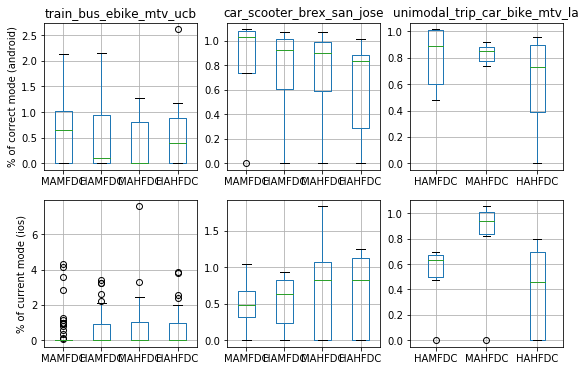

In [35]:
ifig, ax_array = plt.subplots(nrows=2,ncols=3,figsize=(9,6), sharex=False, sharey=False)
timeline_list = ["train_bus_ebike_mtv_ucb", "car_scooter_brex_san_jose", "unimodal_trip_car_bike_mtv_la"]
for i, tl in enumerate(timeline_list):
    print(len(tradeoff_df_filtered.query("timeline == @tl & phone_os == 'android'")))
    tradeoff_df_filtered.query("timeline == @tl & phone_os == 'android'").boxplot(ax = ax_array[0][i], column=["matching_pct"], by=["quality"])
    ax_array[0][i].set_title(tl)
    print(len(tradeoff_df_filtered.query("timeline == @tl & phone_os == 'ios'")))
    tradeoff_df_filtered.query("timeline == @tl & phone_os == 'ios'").boxplot(ax = ax_array[1][i], column=["matching_pct"], by=["quality"])
    ax_array[1][i].set_title("")
    # tradeoff_df.query("timeline == @tl & phone_os == 'ios'").boxplot(ax = ax_array[2][i], column=["visit_reports"], by=["quality"])
    # ax_array[2][i].set_title("")

    # print(android_ax_returned.shape, ios_ax_returned.shape)

for i, ax in enumerate(ax_array[0]):
    ax.set_xticklabels([q2r_map[int(t.get_text())] for t in ax.get_xticklabels()])
    ax.set_xlabel("")

for i, ax in enumerate(ax_array[1]):
    ax.set_xticklabels([q2r_map[int(t.get_text())] for t in ax.get_xticklabels()])
    ax.set_xlabel("")

# for ax in ax_array[1]:
#     ax.set_xticklabels(q2r_ios_list[1:])
#     ax.set_xlabel("")

# for ax in ax_array[2]:
#     ax.set_xticklabels(q2r_ios_list[1:])
#     ax.set_xlabel("")

ax_array[0][0].set_ylabel("% of correct mode (android)")
ax_array[1][0].set_ylabel("% of current mode (ios)")
# ax_array[2][0].set_ylabel("Difference in visit reports (ios)")
# ifig.suptitle("% of section that has the correct mode v/s configured quality over multiple timelines")
ifig.suptitle("")
# ifig.tight_layout()

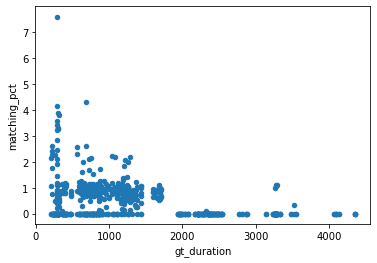

In [36]:
tradeoff_df_filtered.plot(x="gt_duration", y="matching_pct", kind='scatter')

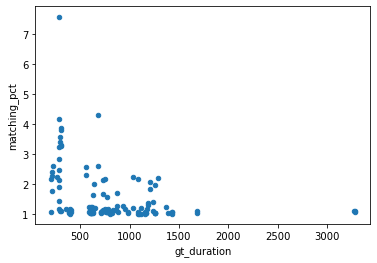

In [37]:
tradeoff_df_filtered.query("matching_pct > 1").plot(x="gt_duration", y="matching_pct", kind='scatter')

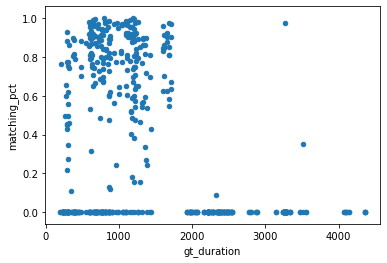

In [38]:
tradeoff_df_filtered.query("matching_pct <= 1").plot(x="gt_duration", y="matching_pct", kind='scatter')

3.0 0.816313011070861 0.0 2.6116478676522386
4.0 0.9793555395793018 0.0 7.592618141257007
5.0 0.6243994760152773 0.0 3.869504654402426
6.0 0.4034239678060334 0.0 1.1682516960568825
7.0 0.0 0.0 0.0
8.0 0.5828087584491781 0.0 0.8825065314737067
9.0 0.873256460356479 0.0 2.5725025349894257
10.0 0.7742473321051042 0.0 1.9996629404217459
11.0 0.5029940089956902 0.0 4.2889511148833686
12.0 0.6789787459444327 0.0 2.164146334200634
13.0 0.5676948975948428 0.0 1.1606818134850923
14.0 0.5459606823836827 0.0 1.714239529716941
15.0 0.4830769642466488 0.0 1.2712768253188822
16.0 0.660840266435015 0.0 1.062825420292869
17.0 0.7274310044217432 0.0 2.219147065836286
18.0 0.775004615782586 0.0 2.1716821239492328
19.0 0.7995148987837816 0.0 1.3724567529540341
20.0 0.8121820602634512 0.0 2.0596689535039805
21.0 0.7405570636257655 0.0 2.188915161316035
22.0 0.7457840534823598 0.26865197262159085 1.234593226844743
23.0 0.574061690203609 0.0 1.0759089411192382
26.0 0.8229392785444573 0.6267817456837507 0.95

<ErrorbarContainer object of 3 artists>

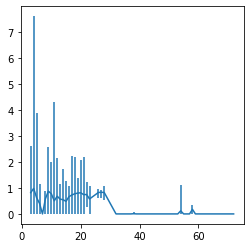

In [39]:
matching_pct_range_list = []
for k, df in tradeoff_df_filtered.groupby("gt_duration_mins"):
    print (k, df.matching_pct.mean(), df.matching_pct.min(), df.matching_pct.max())
    matching_pct_range_list.append({"gt_duration_mins": k, "mean": df.matching_pct.mean(), "min": df.matching_pct.min(), "max": df.matching_pct.max()})
matching_pct_range_df = pd.DataFrame(matching_pct_range_list)
ifig, ax = plt.subplots(1,1, figsize=(4,4), squeeze=True)
ax.errorbar(matching_pct_range_df.gt_duration_mins, y=matching_pct_range_df["mean"],  yerr = [matching_pct_range_df["mean"] - matching_pct_range_df["min"],
                                                                                              matching_pct_range_df["max"] - matching_pct_range_df["mean"]])

<ErrorbarContainer object of 3 artists>

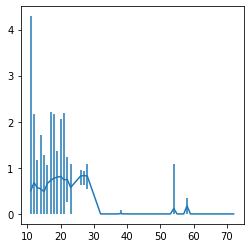

In [40]:
matching_pct_range_df_filtered = matching_pct_range_df.query('gt_duration_mins > 10')
ifig, ax = plt.subplots(1,1, figsize=(4,4), squeeze=True)
ax.errorbar(matching_pct_range_df_filtered.gt_duration_mins, y=matching_pct_range_df_filtered["mean"],  yerr = [matching_pct_range_df_filtered["mean"] - matching_pct_range_df_filtered["min"],
                                                                                              matching_pct_range_df_filtered["max"] - matching_pct_range_df_filtered["mean"]])

In [41]:
np.array(list(zip(np.repeat([1], 37), np.repeat([10], 37)))).shape

(37, 2)

In [42]:
tradeoff_df_filtered.sort_values(by="matching_pct", ascending=False)

,phone_os,phone_label,timeline,range_id,run,duration,role,battery_drain,section_count,trip_id,section_id,section_type,gt_mode,gt_duration,gt_base_mode,matching_pct,quality,gt_duration_mins
1086,ios,ucb-sdb-ios-3,train_bus_ebike_mtv_ucb,MAMFDC v/s MAHFDC:MAHFDC_0,0,42406.560315,MAHFDC,22.000003,7,mtv_to_berkeley_sf_bart_0,walk_to_bus_0,TRAVEL,WALKING,288.764757,1,7.592618,3,4.000000
941,ios,ucb-sdb-ios-2,train_bus_ebike_mtv_ucb,MAMFDC v/s HAMFDC:MAMFDC_0,0,43087.532782,MAMFDC,17.000002,5,berkeley_to_mtv_SF_express_bus_0,walk_downtown_urban_canyon_0,TRAVEL,WALKING,680.635009,1,4.288951,1,11.000000
933,ios,ucb-sdb-ios-2,train_bus_ebike_mtv_ucb,MAMFDC v/s HAMFDC:MAMFDC_0,0,43087.532782,MAMFDC,17.000002,4,mtv_to_berkeley_sf_bart_0,walk_to_bus_0,TRAVEL,WALKING,289.467361,1,4.157082,1,4.000000
831,ios,ucb-sdb-ios-2,train_bus_ebike_mtv_ucb,HAHFDC v/s HAMFDC:HAHFDC_0,0,43172.048678,HAHFDC,43.000001,7,mtv_to_berkeley_sf_bart_0,walk_to_bus_0,TRAVEL,WALKING,303.087207,1,3.869505,4,5.000000
865,ios,ucb-sdb-ios-2,train_bus_ebike_mtv_ucb,HAHFDC v/s HAMFDC:HAHFDC_2,2,42584.159111,HAHFDC,35.000002,11,mtv_to_berkeley_sf_bart_0,walk_to_bus_0,TRAVEL,WALKING,309.817105,1,3.809503,4,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,ios,ucb-sdb-ios-2,train_bus_ebike_mtv_ucb,HAHFDC v/s MAHFDC:HAHFDC_2,2,44750.494011,HAHFDC,33.999997,10,mtv_to_berkeley_sf_bart_0,subway_underground_0,TRAVEL,SUBWAY,3237.071573,4,0.000000,4,53.000000
811,ios,ucb-sdb-ios-2,train_bus_ebike_mtv_ucb,HAHFDC v/s MAHFDC:HAHFDC_2,2,44750.494011,HAHFDC,33.999997,10,mtv_to_berkeley_sf_bart_0,commuter_rail_aboveground_0,TRAVEL,TRAIN,2405.116164,4,0.000000,4,40.000000
808,ios,ucb-sdb-ios-2,train_bus_ebike_mtv_ucb,HAHFDC v/s MAHFDC:HAHFDC_1,1,44897.351051,HAHFDC,37.000000,19,berkeley_to_mtv_SF_express_bus_0,commuter_rail_with_tunnels_0,TRAVEL,TRAIN,4096.520437,4,0.000000,4,68.000000
806,ios,ucb-sdb-ios-2,train_bus_ebike_mtv_ucb,HAHFDC v/s MAHFDC:HAHFDC_1,1,44897.351051,HAHFDC,37.000000,19,berkeley_to_mtv_SF_express_bus_0,light_rail_below_above_ground_0,TRAVEL,LIGHT_RAIL,757.384374,4,0.000000,4,12.000000


In [43]:
tradeoff_df.matching_pct.min(), tradeoff_df.matching_pct.max()

(0.0, 22.235694792044047)

In [44]:
out_of_battery_phones = tradeoff_df.query("timeline=='train_bus_ebike_mtv_ucb' & role=='HAHFDC' & trip_id=='berkeley_to_mtv_SF_express_bus_0' & phone_os == 'android'")
for i in out_of_battery_phones.index:
    tradeoff_df.loc[i,"end_diff_mins"] = float('nan')

### Anomaly checks

We can clearly see that there are several outliers with the start/end timestamps for the sections. Let us explore these in greater detail and see if we can find any patterns.

In [45]:
fmt = lambda ts: arrow.get(ts).to("America/Los_Angeles")


def check_outlier(eval_range, trip_idx, section_id, base_mode):
    eval_trip = eval_range["evaluation_trip_ranges"][trip_idx]
    eval_range["motion_activity_df"]["fmt_time"] = eval_range["motion_activity_df"].ts.apply(lambda ts: fmt(ts))
    eval_trip["motion_activity_df"]["fmt_time"] = eval_trip["motion_activity_df"].ts.apply(lambda ts: fmt(ts))
    eval_section = [s for s in eval_trip["evaluation_section_ranges"] if s["trip_id"] == section_id][0]
    print(fmt(eval_section["start_ts"]), "->", fmt(eval_section["end_ts"]))
    print([(fmt(ssr["start_ts"]), fmt(ssr["end_ts"]), ssr["mode"]) for ssr in eval_trip["sensed_section_ranges"]])
    matching_section_map = embs.find_matching_segments(eval_trip["evaluation_section_ranges"], "trip_id", eval_trip["sensed_section_ranges"])
    sensed_section_range = matching_section_map[section_id]["match"]
    print([(fmt(cm["start_ts"]), fmt(cm["end_ts"]), cm["mode"]) for cm in sensed_section_range])
    matching_sections = [s for s in sensed_section_range if s["mode"] == base_mode]
    print("For %s (%s -> %s) %s, matching_sections = %s" % 
        (eval_section["trip_id"], eval_section["start_ts"], eval_section["end_ts"], base_mode,
        matching_sections))
    matching_ts = sum([(s["end_ts"] - s["start_ts"]) for s in matching_sections])
    print("matching_ts = %s, ground_truth ts = %s" % (matching_ts, (eval_section["end_ts"] - eval_section["start_ts"])))
    matching_pct = matching_ts / (eval_section["end_ts"] - eval_section["start_ts"])
    print(matching_pct)
    print("section activity head")
    ipyd.display(eval_section["motion_activity_df"].head(n=3))
    print("section activity tail")
    ipyd.display(eval_section["motion_activity_df"].tail(n=3))
    section_end_ts = eval_section["end_ts"]
    print("post-section end activity head")
    ipyd.display(eval_range["motion_activity_df"].query("@section_end_ts <= ts <= @section_end_ts + 30 * 60").head())

In [46]:
def check_outlier_expanded(eval_range, trip_idx, section_id, base_mode):
    eval_trip = eval_range["evaluation_trip_ranges"][trip_idx]
    eval_range["motion_activity_df"]["fmt_time"] = eval_range["motion_activity_df"].ts.apply(lambda ts: fmt(ts))
    eval_trip["motion_activity_df"]["fmt_time"] = eval_trip["motion_activity_df"].ts.apply(lambda ts: fmt(ts))
    eval_section = [s for s in eval_trip["evaluation_section_ranges"] if s["trip_id"] == section_id][0]
    print(fmt(eval_section["start_ts"]), "->", fmt(eval_section["end_ts"]))
    print([(fmt(ssr["start_ts"]), fmt(ssr["end_ts"]), ssr["mode"])
           for ssr in eval_trip["sensed_section_ranges"]])
    trip_ma_df = eval_trip["motion_activity_df"]
    # we may get some transitions after the trip ends 
    # let's expand the activity range to account for that
    trip_end_ts = eval_trip["end_ts"]
    extended_ma_df = eval_range["motion_activity_df"].query("@trip_end_ts <= ts <= @trip_end_ts + 30 * 60")
    ma_df = pd.concat([trip_ma_df, extended_ma_df],
            axis="index")

    curr_trip_section_transitions = embs.find_section_transitions(
        ma_df.query(embs.VALID_QUERIES_NO_STILL["android"]), embs.TRANSITION_FNS["android"])
    
    ipyd.display(curr_trip_section_transitions)
    
    last_section = eval_trip["evaluation_section_ranges"][-1]
    last_section_gt = pv_ucb.spec_details.get_ground_truth_for_leg(eval_trip["trip_id_base"], last_section["trip_id_base"], eval_trip["start_ts"], eval_trip["end_ts"])
    if last_section_gt["mode"] == "WALKING":
        # For trip that end in walking, we need to include still transitions as valid
        # otherwise, there is no end transition from walking to a valid mode
        if len(curr_trip_section_transitions) > 0:
            curr_last_transition_ts = curr_trip_section_transitions.iloc[-1].ts
        else:
            curr_last_transition_ts = 0
        print("Trip ending in walking found, checking for any final still transitions > %s" % curr_last_transition_ts)
        still_section_transitions = extended_ma_df.query("ts > @curr_last_transition_ts").query(embs.STILL_ENTRIES["android"])
        if len(still_section_transitions) > 0:
            curr_trip_section_transitions = curr_trip_section_transitions.append(still_section_transitions.iloc[0])
            
    ipyd.display(curr_trip_section_transitions)

    matching_section_map = embs.find_matching_segments(eval_trip["evaluation_section_ranges"], "trip_id", eval_trip["sensed_section_ranges"])
    sensed_section_range = matching_section_map[section_id]["match"]
    print([(fmt(cm["start_ts"]), fmt(cm["end_ts"]), cm["mode"]) for cm in sensed_section_range])
    matching_sections = [s for s in sensed_section_range if s["mode"] == base_mode]
    print("For %s (%s -> %s) %s, matching_sections = %s" % 
        (eval_section["trip_id"], eval_section["start_ts"], eval_section["end_ts"], base_mode,
        matching_sections))
    matching_ts = sum([(s["end_ts"] - s["start_ts"]) for s in matching_sections])
    print("matching_ts = %s, ground_truth ts = %s" % (matching_ts, (eval_section["end_ts"] - eval_section["start_ts"])))
    matching_pct = matching_ts / (eval_section["end_ts"] - eval_section["start_ts"])
    print(matching_pct)
    print("section activity head")
    ipyd.display(eval_section["motion_activity_df"].head(n=3))
    print("section activity tail")
    ipyd.display(eval_section["motion_activity_df"].tail(n=3))
    section_end_ts = eval_section["end_ts"]
    print("post-section end activity head")
    ipyd.display(eval_range["motion_activity_df"].query("@section_end_ts <= ts <= @section_end_ts + 30 * 60").head())

#### sections which have matching pct > 1

This is mainly caused by 

- most of the highest values are from `walk_start` and `walk_end`. This is because we end up matching them with sections that correspond to the entire trip and not just the transitions. For e.g. `walk_end` is from `19:20:31 -> 19:20:57` but it matches the section from `19:01:53 -> 19:27:21` because it is all WALKING.

- looking at longer sections, the first "real" section is `walk to the bikeshare location_0`. Again, it was from `16:37:07 -> 2019-07-24T16:41:54` but we matched the entire `WALKING` range of `16:38:36 -> 17:21:13`

In [47]:
tradeoff_df.query("matching_pct > 0").sort_values(by="matching_pct")

,phone_os,phone_label,timeline,range_id,run,duration,role,battery_drain,section_count,trip_id,section_id,section_type,gt_mode,gt_duration,gt_base_mode,matching_pct,quality,gt_duration_mins,end_diff_mins
155,android,ucb-sdb-android-2,car_scooter_brex_san_jose,HAHFDC v/s HAMFDC:HAHFDC_1,1,20692.400000,HAHFDC,47.000004,11,bus trip with e-scooter access_0,walk_start_0,ACCESS,WALKING,116.492305,1,0.017169,4,1.000000,nan
446,android,ucb-sdb-android-2,train_bus_ebike_mtv_ucb,HAHFDC v/s MAHFDC:HAHFDC_1,1,44683.567000,HAHFDC,92.000000,13,berkeley_to_mtv_SF_express_bus_0,tt_ebike_bikeshare_urban_long_express_bus_0,TRANSFER,WALKING,224.342274,1,0.053490,4,3.000000,nan
795,ios,ucb-sdb-ios-2,train_bus_ebike_mtv_ucb,HAHFDC v/s MAHFDC:HAHFDC_1,1,44897.351051,HAHFDC,37.000000,11,mtv_to_berkeley_sf_bart_0,tt_commuter_rail_aboveground_subway_underground_0,TRANSFER,WALKING,363.241334,1,0.073130,4,6.000000,nan
947,ios,ucb-sdb-ios-2,train_bus_ebike_mtv_ucb,MAMFDC v/s HAMFDC:MAMFDC_1,1,43011.696812,MAMFDC,17.000002,8,mtv_to_berkeley_sf_bart_0,commuter_rail_aboveground_0,TRAVEL,TRAIN,2322.062458,4,0.090185,1,38.000000,nan
863,ios,ucb-sdb-ios-2,train_bus_ebike_mtv_ucb,HAHFDC v/s HAMFDC:HAHFDC_2,2,42584.159111,HAHFDC,35.000002,11,mtv_to_berkeley_sf_bart_0,tt_commuter_rail_aboveground_subway_underground_0,TRANSFER,WALKING,108.661087,1,0.092026,4,1.000000,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,android,ucb-sdb-android-3,unimodal_trip_car_bike_mtv_la,HAHFDC v/s HAMFDC:HAMFDC_1,1,8928.076000,HAMFDC,10.000000,4,suburb_bicycling_0,walk_end_0,ACCESS,WALKING,28.350379,1,9.594228,2,0.000000,nan
935,ios,ucb-sdb-ios-2,train_bus_ebike_mtv_ucb,MAMFDC v/s HAMFDC:MAMFDC_0,0,43087.532782,MAMFDC,17.000002,4,mtv_to_berkeley_sf_bart_0,walk_end_0,ACCESS,WALKING,117.414873,1,10.248612,1,1.000000,nan
349,ios,ucb-sdb-ios-3,car_scooter_brex_san_jose,HAHFDC v/s HAMFDC:HAMFDC_1,1,24388.158013,HAMFDC,11.000001,12,bus trip with e-scooter access_0,tt_city_escooter_city_bus_rapid_transit_0,TRANSFER,WALKING,47.764925,1,11.326214,2,0.000000,nan
293,ios,ucb-sdb-ios-2,car_scooter_brex_san_jose,HAHFDC v/s HAMFDC:HAHFDC_1,1,24145.188474,HAHFDC,6.999999,5,bus trip with e-scooter access_0,tt_city_escooter_city_bus_rapid_transit_0,TRANSFER,WALKING,47.764925,1,11.619315,4,0.000000,nan


In [48]:
tradeoff_df.query("phone_os == 'ios' & phone_label == 'ucb-sdb-ios-3' & timeline == 'unimodal_trip_car_bike_mtv_la'")

,phone_os,phone_label,timeline,range_id,run,duration,role,battery_drain,section_count,trip_id,section_id,section_type,gt_mode,gt_duration,gt_base_mode,matching_pct,quality,gt_duration_mins,end_diff_mins
108,ios,ucb-sdb-ios-3,unimodal_trip_car_bike_mtv_la,HAHFDC v/s MAHFDC:MAHFDC_0,0,8057.337313,MAHFDC,2.999997,0,suburb_city_driving_weekend_0,walk_start_0,ACCESS,WALKING,69.110557,1,0.000000,3,1.000000,nan
109,ios,ucb-sdb-ios-3,unimodal_trip_car_bike_mtv_la,HAHFDC v/s MAHFDC:MAHFDC_0,0,8057.337313,MAHFDC,2.999997,0,suburb_city_driving_weekend_0,suburb_city_driving_weekend_0,TRAVEL,CAR,743.505667,5,0.000000,3,12.000000,nan
110,ios,ucb-sdb-ios-3,unimodal_trip_car_bike_mtv_la,HAHFDC v/s MAHFDC:MAHFDC_0,0,8057.337313,MAHFDC,2.999997,0,suburb_city_driving_weekend_0,walk_end_0,ACCESS,WALKING,149.607138,1,0.000000,3,2.000000,nan
111,ios,ucb-sdb-ios-3,unimodal_trip_car_bike_mtv_la,HAHFDC v/s MAHFDC:MAHFDC_0,0,8057.337313,MAHFDC,2.999997,1,suburb_bicycling_0,walk_start_0,ACCESS,WALKING,109.115928,1,0.000000,3,1.000000,nan
112,ios,ucb-sdb-ios-3,unimodal_trip_car_bike_mtv_la,HAHFDC v/s MAHFDC:MAHFDC_0,0,8057.337313,MAHFDC,2.999997,1,suburb_bicycling_0,suburb_bicycling_0,TRAVEL,BICYCLING,1164.417796,2,1.023641,3,19.000000,nan
113,ios,ucb-sdb-ios-3,unimodal_trip_car_bike_mtv_la,HAHFDC v/s MAHFDC:MAHFDC_0,0,8057.337313,MAHFDC,2.999997,1,suburb_bicycling_0,walk_end_0,ACCESS,WALKING,26.341461,1,0.000000,3,0.000000,nan
114,ios,ucb-sdb-ios-3,unimodal_trip_car_bike_mtv_la,HAHFDC v/s MAHFDC:MAHFDC_1,1,8912.989230,MAHFDC,2.999997,2,suburb_city_driving_weekend_0,walk_start_0,ACCESS,WALKING,97.286770,1,0.000000,3,1.000000,nan
115,ios,ucb-sdb-ios-3,unimodal_trip_car_bike_mtv_la,HAHFDC v/s MAHFDC:MAHFDC_1,1,8912.989230,MAHFDC,2.999997,2,suburb_city_driving_weekend_0,suburb_city_driving_weekend_0,TRAVEL,CAR,626.553464,5,0.820550,3,10.000000,nan
116,ios,ucb-sdb-ios-3,unimodal_trip_car_bike_mtv_la,HAHFDC v/s MAHFDC:MAHFDC_1,1,8912.989230,MAHFDC,2.999997,2,suburb_city_driving_weekend_0,walk_end_0,ACCESS,WALKING,76.302319,1,2.043925,3,1.000000,nan
117,ios,ucb-sdb-ios-3,unimodal_trip_car_bike_mtv_la,HAHFDC v/s MAHFDC:MAHFDC_1,1,8912.989230,MAHFDC,2.999997,1,suburb_bicycling_0,walk_start_0,ACCESS,WALKING,42.818049,1,0.000000,3,0.000000,nan


In [49]:
av_la.map()['ios']['ucb-sdb-ios-3']["evaluation_ranges"][0]["evaluation_trip_ranges"][0]["sensed_section_ranges"]

[]

In [50]:
check_outlier(av_la.map()['ios']['ucb-sdb-ios-3']["evaluation_ranges"][0], 1, "walk_end_0", "WALKING")

2019-07-27T19:20:31.060968-07:00 -> 2019-07-27T19:20:57.402429-07:00
[(<Arrow [2019-07-27T19:01:45.481526-07:00]>, <Arrow [2019-07-27T19:21:37.427862-07:00]>, 2)]
Found mismatched lengths 3 != 1, need to use more complex matching
[(<Arrow [2019-07-27T19:01:45.481526-07:00]>, <Arrow [2019-07-27T19:21:37.427862-07:00]>, 2)]
For walk_end_0 (1564280431.060968 -> 1564280457.402429) WALKING, matching_sections = []
matching_ts = 0, ground_truth ts = 26.341461181640625
0.0
section activity head


,unknown,cycling,automotive,ts,confidence,stationary,walking,running,write_ts,hr


section activity tail


,unknown,cycling,automotive,ts,confidence,stationary,walking,running,write_ts,hr


post-section end activity head


,unknown,cycling,automotive,ts,confidence,stationary,walking,running,write_ts,hr,fmt_time
179,False,False,False,1564280476.342081,high,False,False,False,1564280476.342081,1.725314,2019-07-27T19:21:16.342081-07:00
180,False,False,False,1564280496.064080,high,False,True,False,1564280496.064080,1.730792,2019-07-27T19:21:36.064080-07:00
181,False,False,False,1564280556.679510,high,False,False,False,1564280556.679510,1.747630,2019-07-27T19:22:36.679510-07:00
182,False,False,False,1564280841.679510,high,True,False,False,1564280841.679510,1.826796,2019-07-27T19:27:21.679510-07:00
183,False,False,False,1564280881.679510,high,False,False,False,1564280881.679510,1.837908,2019-07-27T19:28:01.679510-07:00


In [51]:
check_outlier(av_ucb.map()['ios']['ucb-sdb-ios-3']["evaluation_ranges"][0], 2, "walk to the bikeshare location_0", "WALKING")

2019-07-24T16:37:07.746717-07:00 -> 2019-07-24T16:41:54.618997-07:00
[(<Arrow [2019-07-24T16:39:20.902216-07:00]>, <Arrow [2019-07-24T17:20:53.411158-07:00]>, 2), (<Arrow [2019-07-24T17:21:21.346664-07:00]>, <Arrow [2019-07-24T17:59:50.559638-07:00]>, 5), (<Arrow [2019-07-24T17:59:56.990865-07:00]>, <Arrow [2019-07-24T18:16:49.171143-07:00]>, 1), (<Arrow [2019-07-24T18:16:55.588682-07:00]>, <Arrow [2019-07-24T18:25:04.015177-07:00]>, 2), (<Arrow [2019-07-24T18:25:10.460159-07:00]>, <Arrow [2019-07-24T18:27:07.621832-07:00]>, 1), (<Arrow [2019-07-24T18:27:14.058288-07:00]>, <Arrow [2019-07-24T18:27:20.487449-07:00]>, 1), (<Arrow [2019-07-24T18:27:26.916014-07:00]>, <Arrow [2019-07-24T18:36:26.033059-07:00]>, 5), (<Arrow [2019-07-24T18:36:32.459952-07:00]>, <Arrow [2019-07-24T19:40:37.517945-07:00]>, 5), (<Arrow [2019-07-24T19:40:43.961104-07:00]>, <Arrow [2019-07-24T20:03:02.696398-07:00]>, 1)]
Found mismatched lengths 12 != 9, need to use more complex matching
[(<Arrow [2019-07-24T16:3

,unknown,cycling,automotive,ts,confidence,stationary,walking,running,write_ts,hr
425,False,False,False,1564011515.829693,high,True,False,False,1564011515.829693,8.850933
426,False,False,False,1564011516.155382,high,False,True,False,1564011516.155382,8.851023


section activity tail


,unknown,cycling,automotive,ts,confidence,stationary,walking,running,write_ts,hr
425,False,False,False,1564011515.829693,high,True,False,False,1564011515.829693,8.850933
426,False,False,False,1564011516.155382,high,False,True,False,1564011516.155382,8.851023


post-section end activity head


,unknown,cycling,automotive,ts,confidence,stationary,walking,running,write_ts,hr,fmt_time
427,False,False,False,1564012017.010574,high,False,False,False,1564012017.010574,8.990149,2019-07-24T16:46:57.010574-07:00
428,False,False,False,1564012039.891779,medium,False,True,False,1564012039.891779,8.996505,2019-07-24T16:47:19.891779-07:00
429,False,False,False,1564012052.603128,high,False,True,False,1564012052.603128,9.000036,2019-07-24T16:47:32.603128-07:00
430,False,False,False,1564012210.218107,high,False,False,False,1564012210.218107,9.043818,2019-07-24T16:50:10.218107-07:00
431,False,False,False,1564012225.773005,high,True,False,False,1564012225.773005,9.048139,2019-07-24T16:50:25.773005-07:00


#### sections which have 0 matching_pct

- suburb_city_driving_weekend_0: matches a walking trip, no motion activity until tracking actually stops. GT trip end for the `walk_start` section is `17:40:03`, first point in the motion activity df for the **range** is at `17:46:39`. The AUTOMOTIVE range GT end is `17:52:26`; the sensed range is from `18:33:45 -> 19:41:13`.
- similarly for `city_escooter`

   ```
   Ground truth = 16:18:07 -> 16:38:14
   (<Arrow [2019-07-22T16:11:09.955601-07:00]>, <Arrow [2019-07-22T16:59:30.826229-07:00]>, 'WALKING'
   (<Arrow [2019-07-22T16:59:30.826229-07:00]>, <Arrow [2019-07-22T17:01:30.321116-07:00]>, 'AUTOMOTIVE'
   (<Arrow [2019-07-22T17:01:30.321116-07:00]>, <Arrow [2019-07-22T17:02:54.217346-07:00]>, 'WALKING'
   (<Arrow [2019-07-22T17:02:54.217346-07:00]>, <Arrow [2019-07-22T17:34:33.386226-07:00]>, 'AUTOMOTIVE'
   (<Arrow [2019-07-22T17:34:33.386226-07:00]>, <Arrow [2019-07-22T17:46:59.568747-07:00]>, 'WALKING')
   ```

- for `commuter_rail_with_tunnels_0`

Phone ran out during this section. Need to exclude

- similarly for `inner_suburb_downtown_walk_0`

- for `suburb_city_driving_weekend_0`, classified as `CYCLING`


```

2019-07-27T17:40:03.318182-07:00 -> 2019-07-27T17:52:26.823849-07:00
[(<Arrow [2019-07-27T17:43:45.507000-07:00]>, <Arrow [2019-07-27T17:51:10.151000-07:00]>, 'CYCLING'
(<Arrow [2019-07-27T17:51:10.151000-07:00]>, <Arrow [2019-07-27T17:53:44.761000-07:00]>, 'AUTOMOTIVE')]
```

In [52]:
tradeoff_df.query("matching_pct == 0").head()

,phone_os,phone_label,timeline,range_id,run,duration,role,battery_drain,section_count,trip_id,section_id,section_type,gt_mode,gt_duration,gt_base_mode,matching_pct,quality,gt_duration_mins,end_diff_mins
0,android,ucb-sdb-android-2,unimodal_trip_car_bike_mtv_la,HAHFDC v/s HAMFDC:HAHFDC_0,0,8097.918000,HAHFDC,19.000000,2,suburb_city_driving_weekend_0,walk_start_0,ACCESS,WALKING,69.110557,1,0.000000,4,1.000000,nan
2,android,ucb-sdb-android-2,unimodal_trip_car_bike_mtv_la,HAHFDC v/s HAMFDC:HAHFDC_0,0,8097.918000,HAHFDC,19.000000,2,suburb_city_driving_weekend_0,walk_end_0,ACCESS,WALKING,149.607138,1,0.000000,4,2.000000,nan
3,android,ucb-sdb-android-2,unimodal_trip_car_bike_mtv_la,HAHFDC v/s HAMFDC:HAHFDC_0,0,8097.918000,HAHFDC,19.000000,7,suburb_bicycling_0,walk_start_0,ACCESS,WALKING,109.115928,1,0.000000,4,1.000000,nan
6,android,ucb-sdb-android-2,unimodal_trip_car_bike_mtv_la,HAHFDC v/s HAMFDC:HAHFDC_1,1,8989.307000,HAHFDC,21.000000,2,suburb_city_driving_weekend_0,walk_start_0,ACCESS,WALKING,97.286770,1,0.000000,4,1.000000,nan
9,android,ucb-sdb-android-2,unimodal_trip_car_bike_mtv_la,HAHFDC v/s HAMFDC:HAHFDC_1,1,8989.307000,HAHFDC,21.000000,1,suburb_bicycling_0,walk_start_0,ACCESS,WALKING,42.818049,1,0.000000,4,0.000000,nan


In [53]:
check_outlier(av_la.map()['android']['ucb-sdb-android-3']["evaluation_ranges"][0], 0, "walk_start_0", "WALKING")

2019-07-27T17:38:54.192643-07:00 -> 2019-07-27T17:40:03.303200-07:00
[(<Arrow [2019-07-27T17:46:18.389000-07:00]>, <Arrow [2019-07-27T17:46:59-07:00]>, 5), (<Arrow [2019-07-27T17:47:24.433000-07:00]>, <Arrow [2019-07-27T17:53:24-07:00]>, 5), (<Arrow [2019-07-27T17:53:53-07:00]>, <Arrow [2019-07-27T17:56:56.168000-07:00]>, 1)]
Found matching lengths 3 = 3
[(<Arrow [2019-07-27T17:46:18.389000-07:00]>, <Arrow [2019-07-27T17:46:59-07:00]>, 5)]
For walk_start_0 (1564274334.1926432 -> 1564274403.3032) WALKING, matching_sections = []
matching_ts = 0, ground_truth ts = 69.1105568408966
0.0
section activity head


,zzbhB,zzbhC,write_ts,ts,fmt_time,hr


section activity tail


,zzbhB,zzbhC,write_ts,ts,fmt_time,hr


post-section end activity head


,zzbhB,zzbhC,write_ts,ts,fmt_time,hr
0,1,62,1564274799.255000,1564274799.255000,2019-07-27T17:46:39.255000-07:00,0.141927
1,0,93,1564274844.391000,1564274844.391000,2019-07-27T17:47:24.391000-07:00,0.154464
2,4,40,1564274876.142000,1564274876.142000,2019-07-27T17:47:56.142000-07:00,0.163284
3,4,40,1564274908.298000,1564274908.298000,2019-07-27T17:48:28.298000-07:00,0.172216
4,4,40,1564274939.241000,1564274939.241000,2019-07-27T17:48:59.241000-07:00,0.180812


In [54]:
tradeoff_df.query("matching_pct == 0 & section_id != 'walk_start_0' and section_id != 'walk_end_0' & ((section_id != 'commuter_rail_with_tunnels_0' & section_id != 'inner_suburb_downtown_walk_0') | phone_os != 'android')")

,phone_os,phone_label,timeline,range_id,run,duration,role,battery_drain,section_count,trip_id,section_id,section_type,gt_mode,gt_duration,gt_base_mode,matching_pct,quality,gt_duration_mins,end_diff_mins
19,android,ucb-sdb-android-2,unimodal_trip_car_bike_mtv_la,HAHFDC v/s MAHFDC:HAHFDC_0,0,7942.590000,HAHFDC,19.000000,2,suburb_city_driving_weekend_0,suburb_city_driving_weekend_0,TRAVEL,CAR,777.983976,5,0.000000,4,12.000000,nan
28,android,ucb-sdb-android-2,unimodal_trip_car_bike_mtv_la,HAHFDC v/s MAHFDC:HAHFDC_1,1,8213.055000,HAHFDC,20.000000,3,suburb_bicycling_0,suburb_bicycling_0,TRAVEL,BICYCLING,1180.469716,2,0.000000,4,19.000000,nan
31,android,ucb-sdb-android-2,unimodal_trip_car_bike_mtv_la,HAHFDC v/s MAHFDC:HAHFDC_2,2,8733.806000,HAHFDC,20.000000,1,suburb_city_driving_weekend_0,suburb_city_driving_weekend_0,TRAVEL,CAR,783.546198,5,0.000000,4,13.000000,nan
73,ios,ucb-sdb-ios-2,unimodal_trip_car_bike_mtv_la,HAHFDC v/s MAHFDC:HAHFDC_0,0,8053.158308,HAHFDC,0.000000,1,suburb_city_driving_weekend_0,suburb_city_driving_weekend_0,TRAVEL,CAR,743.505667,5,0.000000,4,12.000000,nan
91,ios,ucb-sdb-ios-2,unimodal_trip_car_bike_mtv_la,HAHFDC v/s HAMFDC:HAHFDC_0,0,7914.362823,HAHFDC,0.000000,2,suburb_city_driving_weekend_0,suburb_city_driving_weekend_0,TRAVEL,CAR,777.983976,5,0.000000,4,12.000000,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,ios,ucb-sdb-ios-3,train_bus_ebike_mtv_ucb,MAMFDC v/s HAMFDC:HAMFDC_2,2,42485.758962,HAMFDC,43.000001,9,mtv_to_berkeley_sf_bart_0,subway_underground_0,TRAVEL,SUBWAY,3274.424419,4,0.000000,2,54.000000,nan
1172,ios,ucb-sdb-ios-3,train_bus_ebike_mtv_ucb,MAMFDC v/s HAMFDC:HAMFDC_2,2,42485.758962,HAMFDC,43.000001,9,mtv_to_berkeley_sf_bart_0,city_bus_short_0,TRAVEL,BUS,269.644574,3,0.000000,2,4.000000,nan
1178,ios,ucb-sdb-ios-3,train_bus_ebike_mtv_ucb,MAMFDC v/s HAMFDC:HAMFDC_2,2,42485.758962,HAMFDC,43.000001,21,berkeley_to_mtv_SF_express_bus_0,express_bus_0,TRAVEL,BUS,2219.057478,3,0.000000,2,36.000000,nan
1180,ios,ucb-sdb-ios-3,train_bus_ebike_mtv_ucb,MAMFDC v/s HAMFDC:HAMFDC_2,2,42485.758962,HAMFDC,43.000001,21,berkeley_to_mtv_SF_express_bus_0,light_rail_below_above_ground_0,TRAVEL,LIGHT_RAIL,685.942051,4,0.000000,2,11.000000,nan


In [55]:
check_outlier(av_sj.map()['ios']['ucb-sdb-ios-3']["evaluation_ranges"][0], 1, "city_escooter_0", "CYCLING")

2019-07-22T16:18:07.711892-07:00 -> 2019-07-22T16:38:14.340023-07:00
[(<Arrow [2019-07-22T16:22:32.772816-07:00]>, <Arrow [2019-07-22T16:59:29.946628-07:00]>, 2), (<Arrow [2019-07-22T16:59:34.244279-07:00]>, <Arrow [2019-07-22T17:01:26.617760-07:00]>, 1), (<Arrow [2019-07-22T17:01:33.056928-07:00]>, <Arrow [2019-07-22T17:02:52.728498-07:00]>, 5), (<Arrow [2019-07-22T17:02:57.023672-07:00]>, <Arrow [2019-07-22T17:34:27.164005-07:00]>, 5), (<Arrow [2019-07-22T17:34:33.674745-07:00]>, <Arrow [2019-07-22T17:44:21.778416-07:00]>, 1)]
Found mismatched lengths 6 != 5, need to use more complex matching
[(<Arrow [2019-07-22T16:22:32.772816-07:00]>, <Arrow [2019-07-22T16:59:29.946628-07:00]>, 2)]
For city_escooter_0 (1563837487.7118921 -> 1563838694.340023) CYCLING, matching_sections = []
matching_ts = 0, ground_truth ts = 1206.6281309127808
0.0
section activity head


,unknown,cycling,automotive,ts,confidence,stationary,walking,running,write_ts,hr
423,False,False,False,1563837672.538095,high,False,False,False,1563837672.538095,4.518558
424,False,False,False,1563837715.766946,medium,False,True,False,1563837715.766946,4.530566
425,False,False,False,1563837771.056816,high,True,False,False,1563837771.056816,4.545924


section activity tail


,unknown,cycling,automotive,ts,confidence,stationary,walking,running,write_ts,hr
432,False,False,False,1563838203.918852,high,False,False,False,1563838203.918852,4.666164
433,False,False,False,1563838206.461546,medium,False,True,False,1563838206.461546,4.666870
434,False,False,False,1563838465.784283,high,False,True,False,1563838465.784283,4.738904


post-section end activity head


,unknown,cycling,automotive,ts,confidence,stationary,walking,running,write_ts,hr,fmt_time
435,False,False,False,1563838795.316715,high,True,False,False,1563838795.316715,4.830441,2019-07-22T16:39:55.316715-07:00
436,False,False,False,1563838806.447073,high,False,False,False,1563838806.447073,4.833533,2019-07-22T16:40:06.447073-07:00
437,False,False,False,1563838824.869576,high,True,False,False,1563838824.869576,4.838650,2019-07-22T16:40:24.869576-07:00
438,False,False,False,1563838837.262031,high,False,False,False,1563838837.262031,4.842092,2019-07-22T16:40:37.262031-07:00
439,False,False,False,1563838855.055128,high,True,False,False,1563838855.055128,4.847035,2019-07-22T16:40:55.055128-07:00


In [56]:
check_outlier_expanded(av_ucb.map()['android']['ucb-sdb-android-2']["evaluation_ranges"][0], 2, "commuter_rail_with_tunnels_0", "AUTOMOTIVE")

2019-07-24T18:32:46.628230-07:00 -> 2019-07-24T19:40:41.259026-07:00
[(<Arrow [2019-07-24T16:36:40.823566-07:00]>, <Arrow [2019-07-24T16:42:16-07:00]>, 1), (<Arrow [2019-07-24T16:42:18-07:00]>, <Arrow [2019-07-24T17:01:23-07:00]>, 2), (<Arrow [2019-07-24T17:01:24-07:00]>, <Arrow [2019-07-24T17:01:45-07:00]>, 1), (<Arrow [2019-07-24T17:01:46-07:00]>, <Arrow [2019-07-24T17:02:24-07:00]>, 1), (<Arrow [2019-07-24T17:02:25-07:00]>, <Arrow [2019-07-24T17:06:29-07:00]>, 1), (<Arrow [2019-07-24T17:17:46.456333-07:00]>, <Arrow [2019-07-24T18:00:05-07:00]>, 1), (<Arrow [2019-07-24T18:00:06-07:00]>, <Arrow [2019-07-24T18:08:27.933000-07:00]>, 1), (<Arrow [2019-07-24T18:10:38.307479-07:00]>, <Arrow [2019-07-24T18:25:23-07:00]>, 2), (<Arrow [2019-07-24T18:25:24-07:00]>, <Arrow [2019-07-24T18:29:22-07:00]>, 1), (<Arrow [2019-07-24T18:32:22-07:00]>, <Arrow [2019-07-24T18:44:07-07:00]>, 5), (<Arrow [2019-07-24T18:46:20.995584-07:00]>, <Arrow [2019-07-24T19:29:49-07:00]>, 5)]


,zzbhB,zzbhC,write_ts,ts,fmt_time,hr
766,2,96,1564011666.225000,1564011666.225000,2019-07-24T16:41:06.225000-07:00,8.883894
772,1,100,1564011737.999000,1564011737.999000,2019-07-24T16:42:17.999000-07:00,8.903832
886,0,92,1564012883.473000,1564012883.473000,2019-07-24T17:01:23.473000-07:00,9.222019
888,1,96,1564012905.628000,1564012905.628000,2019-07-24T17:01:45.628000-07:00,9.228173
891,2,96,1564012944.484000,1564012944.484000,2019-07-24T17:02:24.484000-07:00,9.238966
958,0,96,1564014188.840000,1564014188.840000,2019-07-24T17:23:08.840000-07:00,9.584621
1139,2,86,1564016405.574000,1564016405.574000,2019-07-24T18:00:05.574000-07:00,10.200380
1203,0,71,1564017222.751000,1564017222.751000,2019-07-24T18:13:42.751000-07:00,10.427374
1261,2,89,1564017923.803000,1564017923.803000,2019-07-24T18:25:23.803000-07:00,10.622111
1304,0,90,1564018433.765000,1564018433.765000,2019-07-24T18:33:53.765000-07:00,10.763767


Trip ending in walking found, checking for any final still transitions > 1564018433.765


,zzbhB,zzbhC,write_ts,ts,fmt_time,hr
766,2,96,1564011666.225000,1564011666.225000,2019-07-24T16:41:06.225000-07:00,8.883894
772,1,100,1564011737.999000,1564011737.999000,2019-07-24T16:42:17.999000-07:00,8.903832
886,0,92,1564012883.473000,1564012883.473000,2019-07-24T17:01:23.473000-07:00,9.222019
888,1,96,1564012905.628000,1564012905.628000,2019-07-24T17:01:45.628000-07:00,9.228173
891,2,96,1564012944.484000,1564012944.484000,2019-07-24T17:02:24.484000-07:00,9.238966
958,0,96,1564014188.840000,1564014188.840000,2019-07-24T17:23:08.840000-07:00,9.584621
1139,2,86,1564016405.574000,1564016405.574000,2019-07-24T18:00:05.574000-07:00,10.200380
1203,0,71,1564017222.751000,1564017222.751000,2019-07-24T18:13:42.751000-07:00,10.427374
1261,2,89,1564017923.803000,1564017923.803000,2019-07-24T18:25:23.803000-07:00,10.622111
1304,0,90,1564018433.765000,1564018433.765000,2019-07-24T18:33:53.765000-07:00,10.763767


Found mismatched lengths 12 != 11, need to use more complex matching
[(<Arrow [2019-07-24T18:32:22-07:00]>, <Arrow [2019-07-24T18:44:07-07:00]>, 5), (<Arrow [2019-07-24T18:46:20.995584-07:00]>, <Arrow [2019-07-24T19:29:49-07:00]>, 5)]
For commuter_rail_with_tunnels_0 (1564018366.62823 -> 1564022441.259026) AUTOMOTIVE, matching_sections = []
matching_ts = 0, ground_truth ts = 4074.630795955658
0.0
section activity head


,zzbhB,zzbhC,write_ts,ts,fmt_time,hr
1299,3,60,1564018369.768000,1564018369.768000,2019-07-24T18:32:49.768000-07:00,10.745990
1300,4,40,1564018382.503000,1564018382.503000,2019-07-24T18:33:02.503000-07:00,10.749527
1301,4,40,1564018394.904000,1564018394.904000,2019-07-24T18:33:14.904000-07:00,10.752972


section activity tail


,zzbhB,zzbhC,write_ts,ts,fmt_time,hr
1566,0,80,1564021834.896000,1564021834.896000,2019-07-24T19:30:34.896000-07:00,11.708525
1567,4,40,1564021847.788000,1564021847.788000,2019-07-24T19:30:47.788000-07:00,11.712106
1568,4,40,1564021860.894000,1564021860.894000,2019-07-24T19:31:00.894000-07:00,11.715747


post-section end activity head


,zzbhB,zzbhC,write_ts,ts,fmt_time,hr


In [57]:
check_outlier(av_la.map()['android']['ucb-sdb-android-2']["evaluation_ranges"][0], 0, "suburb_city_driving_weekend_0", "AUTOMOTIVE")

2019-07-27T17:40:03.318182-07:00 -> 2019-07-27T17:52:26.823849-07:00
[(<Arrow [2019-07-27T17:42:38.727000-07:00]>, <Arrow [2019-07-27T17:51:10-07:00]>, 5), (<Arrow [2019-07-27T17:51:11-07:00]>, <Arrow [2019-07-27T17:51:30-07:00]>, 2)]
Found mismatched lengths 3 != 2, need to use more complex matching
[(<Arrow [2019-07-27T17:42:38.727000-07:00]>, <Arrow [2019-07-27T17:51:10-07:00]>, 5), (<Arrow [2019-07-27T17:51:11-07:00]>, <Arrow [2019-07-27T17:51:30-07:00]>, 2)]
For suburb_city_driving_weekend_0 (1564274403.318182 -> 1564275146.823849) AUTOMOTIVE, matching_sections = []
matching_ts = 0, ground_truth ts = 743.5056669712067
0.0
section activity head


,zzbhB,zzbhC,write_ts,ts,fmt_time,hr
0,3,34,1564274558.997000,1564274558.997000,2019-07-27T17:42:38.997000-07:00,0.070564
1,3,100,1564274567.579000,1564274567.579000,2019-07-27T17:42:47.579000-07:00,0.072948
2,3,100,1564274576.945000,1564274576.945000,2019-07-27T17:42:56.945000-07:00,0.075549


section activity tail


,zzbhB,zzbhC,write_ts,ts,fmt_time,hr
44,4,40,1564275108.770000,1564275108.770000,2019-07-27T17:51:48.770000-07:00,0.223278
45,4,40,1564275122.205000,1564275122.205000,2019-07-27T17:52:02.205000-07:00,0.227010
46,4,40,1564275134.791000,1564275134.791000,2019-07-27T17:52:14.791000-07:00,0.230506


post-section end activity head


,zzbhB,zzbhC,write_ts,ts,fmt_time,hr
47,4,40,1564275148.193000,1564275148.193000,2019-07-27T17:52:28.193000-07:00,0.234229
48,4,40,1564275160.774000,1564275160.774000,2019-07-27T17:52:40.774000-07:00,0.237724
49,3,38,1564275173.677000,1564275173.677000,2019-07-27T17:52:53.677000-07:00,0.241308
50,4,40,1564275185.820000,1564275185.820000,2019-07-27T17:53:05.820000-07:00,0.244681
51,4,40,1564275198.775000,1564275198.775000,2019-07-27T17:53:18.775000-07:00,0.248280
